In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from datetime import datetime, timedelta
import plotly.express as px

# Importing dataset from google drive:

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/US_Vaccine_data/

[Errno 2] No such file or directory: 'drive/MyDrive/US_Vaccine_data/'
/content/drive/MyDrive/US_Vaccine_data


In [ ]:
%ls

catboost_info/
county_population.csv
COVID-19_Vaccinations_in_the_United_States_County.csv
COVID-19_Vaccinations_in_the_United_States_County_temp.csv
daily_cases_deaths.csv
educationData/
logs.log
Population/
populationData_ignore/
state_policies/
Unemployment/


# Covid 19 dataset

In [ ]:
covid_vaccine_df = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_County_temp.csv',parse_dates = ['Date'], low_memory = False)

In [ ]:
covid_vaccine_df

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,2021-10-20,28161,42,Yalobusha County,MS,59.1,7154,7153.0,68.9,6850,72.6,2501,98.3,98.3,8034.0,66.4,8033.0,77.4,7657.0,81.1,2661.0,99.9,C,12.0,12.0,12.0,12.0,Non-metro,8.0,8.0,8.0,8.0
1,2021-10-20,13229,42,Pierce County,GA,24.4,4748,4748.0,29.0,4587,31.2,1742,51.3,57.6,5518.0,28.3,5518.0,33.7,5312.0,36.1,1916.0,56.4,C,9.0,9.0,10.0,11.0,Non-metro,5.0,5.0,6.0,7.0
2,2021-10-20,27169,42,Winona County,MN,53.2,26839,26776.0,59.9,25094,60.4,7943,89.3,94.0,29743.0,58.9,29663.0,66.4,27899.0,67.2,8820.0,99.1,A,4.0,4.0,4.0,4.0,Non-metro,8.0,8.0,8.0,8.0
3,2021-10-20,19083,42,Hardin County,IA,50.5,8510,8510.0,57.6,8196,60.5,3258,85.7,97.5,8937.0,53.1,8937.0,60.5,8555.0,63.1,3297.0,86.7,A,4.0,4.0,4.0,4.0,Non-metro,8.0,8.0,8.0,8.0
4,2021-10-20,55027,42,Dodge County,WI,46.3,40685,40685.0,52.7,38675,54.7,13395,83.7,97.0,43365.0,49.4,43364.0,56.2,41046.0,58.1,13825.0,86.4,A,3.0,4.0,4.0,4.0,Non-metro,7.0,8.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023983,2020-12-13,36107,51,Tioga County,NY,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1023984,2020-12-13,38055,51,McLean County,ND,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
1023985,2020-12-13,51550,51,Chesapeake city,VA,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1023986,2020-12-13,25015,51,Hampshire County,MA,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN


### Covid - 19 Info of the dataset

In [ ]:
covid_vaccine_df.shape

(1023988, 32)

In [ ]:
len(covid_vaccine_df['FIPS'].unique())

3225

Observation 1: we have 1960 unknown counties

In [ ]:
nanPercent = covid_vaccine_df.isna().sum() / covid_vaccine_df.shape[0] * 100
nanPercent

Date                                        0.000000
FIPS                                        0.000000
MMWR_week                                   0.000000
Recip_County                                0.000000
Recip_State                                 0.000000
Series_Complete_Pop_Pct                     0.000000
Series_Complete_Yes                         0.000000
Series_Complete_12Plus                      1.371207
Series_Complete_12PlusPop_Pct               1.371207
Series_Complete_18Plus                      0.000000
Series_Complete_18PlusPop_Pct               0.000000
Series_Complete_65Plus                      0.000000
Series_Complete_65PlusPop_Pct               0.000000
Completeness_pct                            0.000000
Administered_Dose1_Recip                    3.206776
Administered_Dose1_Pop_Pct                  0.000000
Administered_Dose1_Recip_12Plus             6.968539
Administered_Dose1_Recip_12PlusPop_Pct      1.371207
Administered_Dose1_Recip_18Plus             5.

### Covid 19 - Preprocessing

In [ ]:
Primaryfeatures = covid_vaccine_df.columns

In [ ]:
covid_vaccine_df = covid_vaccine_df[covid_vaccine_df["Recip_County"] != 'Unknown County']

In [ ]:
covid_vaccine_df["FIPS"] = covid_vaccine_df["FIPS"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
covid_vaccine_df.nunique()

Date                                          312
FIPS                                         3224
MMWR_week                                      45
Recip_County                                 1959
Recip_State                                    54
Series_Complete_Pop_Pct                       973
Series_Complete_Yes                        122515
Series_Complete_12Plus                     122088
Series_Complete_12PlusPop_Pct                 992
Series_Complete_18Plus                     120540
Series_Complete_18PlusPop_Pct                 996
Series_Complete_65Plus                      69820
Series_Complete_65PlusPop_Pct                1001
Completeness_pct                              590
Administered_Dose1_Recip                   134914
Administered_Dose1_Pop_Pct                   1000
Administered_Dose1_Recip_12Plus            132619
Administered_Dose1_Recip_12PlusPop_Pct       1001
Administered_Dose1_Recip_18Plus            130937
Administered_Dose1_Recip_18PlusPop_Pct       1001


In [ ]:
use_cols = []
for feat in Primaryfeatures:
  if int(nanPercent[feat]) != 0.0:
    use_cols.append(feat)

use_cols

['Series_Complete_12Plus',
 'Series_Complete_12PlusPop_Pct',
 'Administered_Dose1_Recip',
 'Administered_Dose1_Recip_12Plus',
 'Administered_Dose1_Recip_12PlusPop_Pct',
 'Administered_Dose1_Recip_18Plus',
 'Administered_Dose1_Recip_65Plus',
 'SVI_CTGY',
 'Series_Complete_Pop_Pct_SVI',
 'Series_Complete_12PlusPop_Pct_SVI',
 'Series_Complete_18PlusPop_Pct_SVI',
 'Series_Complete_65PlusPop_Pct_SVI',
 'Metro_status',
 'Series_Complete_Pop_Pct_UR_Equity',
 'Series_Complete_12PlusPop_Pct_UR_Equity',
 'Series_Complete_18PlusPop_Pct_UR_Equity',
 'Series_Complete_65PlusPop_Pct_UR_Equity']

In [ ]:
for col in use_cols:
  covid_vaccine_df[col] = covid_vaccine_df[col].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
covid_vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006101 entries, 0 to 1023987
Data columns (total 32 columns):
 #   Column                                   Non-Null Count    Dtype         
---  ------                                   --------------    -----         
 0   Date                                     1006101 non-null  datetime64[ns]
 1   FIPS                                     1006101 non-null  int64         
 2   MMWR_week                                1006101 non-null  int64         
 3   Recip_County                             1006101 non-null  object        
 4   Recip_State                              1006101 non-null  object        
 5   Series_Complete_Pop_Pct                  1006101 non-null  float64       
 6   Series_Complete_Yes                      1006101 non-null  int64         
 7   Series_Complete_12Plus                   1006101 non-null  float64       
 8   Series_Complete_12PlusPop_Pct            1006101 non-null  float64       
 9   Series_Comple

In [ ]:
covid_vaccine_df.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,2021-10-20,28161,42,Yalobusha County,MS,59.1,7154,7153.0,68.9,6850,72.6,2501,98.3,98.3,8034.0,66.4,8033.0,77.4,7657.0,81.1,2661.0,99.9,C,12.0,12.0,12.0,12.0,Non-metro,8.0,8.0,8.0,8.0
1,2021-10-20,13229,42,Pierce County,GA,24.4,4748,4748.0,29.0,4587,31.2,1742,51.3,57.6,5518.0,28.3,5518.0,33.7,5312.0,36.1,1916.0,56.4,C,9.0,9.0,10.0,11.0,Non-metro,5.0,5.0,6.0,7.0
2,2021-10-20,27169,42,Winona County,MN,53.2,26839,26776.0,59.9,25094,60.4,7943,89.3,94.0,29743.0,58.9,29663.0,66.4,27899.0,67.2,8820.0,99.1,A,4.0,4.0,4.0,4.0,Non-metro,8.0,8.0,8.0,8.0
3,2021-10-20,19083,42,Hardin County,IA,50.5,8510,8510.0,57.6,8196,60.5,3258,85.7,97.5,8937.0,53.1,8937.0,60.5,8555.0,63.1,3297.0,86.7,A,4.0,4.0,4.0,4.0,Non-metro,8.0,8.0,8.0,8.0
4,2021-10-20,55027,42,Dodge County,WI,46.3,40685,40685.0,52.7,38675,54.7,13395,83.7,97.0,43365.0,49.4,43364.0,56.2,41046.0,58.1,13825.0,86.4,A,3.0,4.0,4.0,4.0,Non-metro,7.0,8.0,8.0,8.0


### avg_dataset

In [ ]:
covid_vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006101 entries, 0 to 1023987
Data columns (total 32 columns):
 #   Column                                   Non-Null Count    Dtype         
---  ------                                   --------------    -----         
 0   Date                                     1006101 non-null  datetime64[ns]
 1   FIPS                                     1006101 non-null  int64         
 2   MMWR_week                                1006101 non-null  int64         
 3   Recip_County                             1006101 non-null  object        
 4   Recip_State                              1006101 non-null  object        
 5   Series_Complete_Pop_Pct                  1006101 non-null  float64       
 6   Series_Complete_Yes                      1006101 non-null  int64         
 7   Series_Complete_12Plus                   1006101 non-null  float64       
 8   Series_Complete_12PlusPop_Pct            1006101 non-null  float64       
 9   Series_Comple

In [ ]:
covid_vaccine_df_avg = covid_vaccine_df.groupby(['Recip_County', 'FIPS', 'Recip_State', 'SVI_CTGY', 'Metro_status' ]).agg({
                         'Series_Complete_Pop_Pct':'max', 
                         'Series_Complete_12PlusPop_Pct':'max', 
                         'Series_Complete_18PlusPop_Pct':'max', 
                         'Series_Complete_65PlusPop_Pct':'max', 
                         'Administered_Dose1_Pop_Pct':'max', 
                         'Administered_Dose1_Recip_12PlusPop_Pct':'max', 
                         'Administered_Dose1_Recip_18PlusPop_Pct':'max', 
                         'Administered_Dose1_Recip_65PlusPop_Pct':'max', 
                         'Series_Complete_12PlusPop_Pct_SVI':'max', 
                         'Series_Complete_18PlusPop_Pct_SVI':'max', 
                         'Series_Complete_65PlusPop_Pct_SVI':'max', 
                         'Series_Complete_Pop_Pct_UR_Equity':'max', 
                         'Series_Complete_12PlusPop_Pct_UR_Equity':'max', 
                         'Series_Complete_18PlusPop_Pct_UR_Equity':'max', 
                         'Series_Complete_65PlusPop_Pct_UR_Equity':'max', 
                         'Series_Complete_Yes':'max', 
                         'Series_Complete_12Plus':'max', 
                         'Series_Complete_18Plus':'max', 
                         'Series_Complete_65Plus':'max', 
                         'Administered_Dose1_Recip':'max', 
                         'Administered_Dose1_Recip_12Plus':'max', 
                         'Administered_Dose1_Recip_18Plus':'max',
                         'Administered_Dose1_Recip_65Plus':'max',
                          })

In [ ]:
covid_vaccine_df_avg.columns

Index(['Series_Complete_Pop_Pct', 'Series_Complete_12PlusPop_Pct',
       'Series_Complete_18PlusPop_Pct', 'Series_Complete_65PlusPop_Pct',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65PlusPop_Pct',
       'Series_Complete_12PlusPop_Pct_SVI',
       'Series_Complete_18PlusPop_Pct_SVI',
       'Series_Complete_65PlusPop_Pct_SVI',
       'Series_Complete_Pop_Pct_UR_Equity',
       'Series_Complete_12PlusPop_Pct_UR_Equity',
       'Series_Complete_18PlusPop_Pct_UR_Equity',
       'Series_Complete_65PlusPop_Pct_UR_Equity', 'Series_Complete_Yes',
       'Series_Complete_12Plus', 'Series_Complete_18Plus',
       'Series_Complete_65Plus', 'Administered_Dose1_Recip',
       'Administered_Dose1_Recip_12Plus', 'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_65Plus'],
      dtype='object')

In [ ]:
covid_vaccine_df_avg.head()

,,,,,Series_Complete_Pop_Pct,Series_Complete_12PlusPop_Pct,Series_Complete_18PlusPop_Pct,Series_Complete_65PlusPop_Pct,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_18Plus,Series_Complete_65Plus,Administered_Dose1_Recip,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus
Recip_County,FIPS,Recip_State,SVI_CTGY,Metro_status,,,,,,,,,,,,,,,,,,,,,,,
Abbeville County,45001,SC,D,Non-metro,35.9,41.0,43.2,63.6,39.5,45.0,47.3,67.4,15.0,15.0,15.0,6.0,7.0,7.0,7.0,8809,8808.0,8495,3487,9683.0,9678.0,9309.0,3694.0
Acadia Parish,22001,LA,D,Metro,47.1,56.6,60.6,89.9,52.4,63.0,67.3,95.2,16.0,16.0,16.0,3.0,4.0,4.0,4.0,29212,29209.0,27890,8805,32517.0,32514.0,30975.0,9324.0
Accomack County,51001,VA,D,Non-metro,63.3,73.4,76.1,90.0,70.4,81.6,84.4,94.6,16.0,16.0,16.0,8.0,8.0,8.0,8.0,20464,20459.0,19509,7140,22760.0,22748.0,21624.0,7506.0
Ada County,16001,ID,A,Metro,51.5,0.0,67.0,91.4,56.5,0.0,73.6,96.3,0.0,4.0,4.0,4.0,0.0,4.0,4.0,247959,0.0,247888,65778,272253.0,0.0,272112.0,69311.0
Adair County,19001,IA,A,Non-metro,44.5,52.0,54.1,74.3,47.5,55.6,57.8,78.9,4.0,4.0,4.0,7.0,8.0,8.0,8.0,3181,3181.0,3028,1225,3400.0,3400.0,3232.0,1300.0


In [ ]:
# covid_vaccine_df_avg = covid_vaccine_df.groupby(['Recip_County', 'FIPS', 'Recip_State', 'SVI_CTGY', 'Metro_status']).mean()

In [ ]:
from matplotlib import rcParams

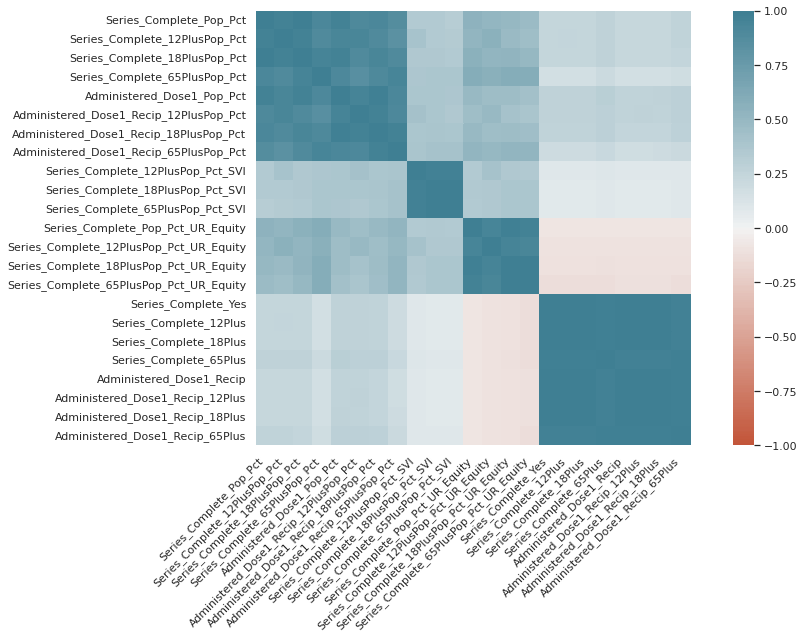

In [ ]:
corr = covid_vaccine_df_avg.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
rcParams['figure.figsize'] = 15,8

# Secondary Datsset

## State Policies Dataset

In [ ]:
%ls

catboost_info/
county_population.csv
COVID-19_Vaccinations_in_the_United_States_County.csv
COVID-19_Vaccinations_in_the_United_States_County_temp.csv
daily_cases_deaths.csv
educationData/
logs.log
Population/
populationData_ignore/
state_policies/
Unemployment/


In [ ]:
%cd state_policies

/content/drive/My Drive/US_Vaccine_data/state_policies


In [ ]:
state_plocies_df = pd.read_csv('statePolicies.csv', low_memory = False)

In [ ]:
state_plocies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Recip_State    51 non-null     object
 1   Free_Vaccine   51 non-null     int64 
 2   Mandate_place  51 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [ ]:
nanPercent = state_plocies_df.isna().sum() / state_plocies_df.shape[0] * 100
nanPercent

Recip_State      0.0
Free_Vaccine     0.0
Mandate_place    0.0
dtype: float64

In [ ]:
covid_vaccine_df.shape

(1006101, 32)

In [ ]:
# fullData = covid_vaccine_df.merge(state_plocies_df, left_on=['Recip_State'], right_on=['Recip_State'])

In [ ]:
# fullData

In [ ]:
# fullData.info()

## Education datset

In [ ]:
%ls

statePolicies.csv


In [ ]:
%cd ..
%ls
%cd educationData/
%ls

/content/drive/My Drive/US_Vaccine_data
catboost_info/
county_population.csv
COVID-19_Vaccinations_in_the_United_States_County.csv
COVID-19_Vaccinations_in_the_United_States_County_temp.csv
daily_cases_deaths.csv
educationData/
logs.log
Population/
populationData_ignore/
state_policies/
Unemployment/
/content/drive/My Drive/US_Vaccine_data/educationData
Education.csv


In [ ]:
education_df = pd.read_csv('Education.csv', low_memory = False)

In [ ]:
education_df = education_df.rename(columns={"FIPS Code": "FIPS"})

In [ ]:
education_df

,FIPS,State,Area name,Less than a high school diploma,High school diploma only,Some college or associate's degree,Bachelor's degree or higher,Percent of adults with less than a high school diploma,Percent of adults with a high school diploma only,Percent of adults completing some college or associate's degree,Percent of adults with a bachelor's degree or higher
0,0,US,United States,"2,64,72,261","5,94,72,748","6,37,56,905","7,09,20,162",12.0,27.0,28.9,32.1
1,1000,AL,Alabama,"4,58,922","10,22,839","9,93,344","8,45,772",13.8,30.8,29.9,25.5
2,1001,AL,Autauga County,"4,291","12,551","10,596","9,929",11.5,33.6,28.4,26.6
3,1003,AL,Baldwin County,"13,893","41,797","47,274","48,148",9.2,27.7,31.3,31.9
4,1005,AL,Barbour County,"4,812","6,396","4,676","2,080",26.8,35.6,26.0,11.6
...,...,...,...,...,...,...,...,...,...,...,...
3278,72145,PR,Vega Baja Municipio,"10,494","9,681","8,905","7,834",28.4,26.2,24.1,21.2
3279,72147,PR,Vieques Municipio,"1,792","2,440",875,"1,121",28.8,39.2,14.0,18.0
3280,72149,PR,Villalba Municipio,"3,330","5,809","2,987","3,015",22.0,38.4,19.7,19.9
3281,72151,PR,Yabucoa Municipio,"6,927","6,132","6,494","4,293",29.0,25.7,27.2,18.0


In [ ]:
nanPercent = education_df.isna().sum() / education_df.shape[0] * 100
nanPercent

FIPS                                                               0.000000
State                                                              0.000000
Area name                                                          0.000000
Less than a high school diploma                                    0.304599
High school diploma only                                           0.304599
Some college or associate's degree                                 0.304599
Bachelor's degree or higher                                        0.304599
Percent of adults with less than a high school diploma             0.304599
Percent of adults with a high school diploma only                  0.304599
Percent of adults completing some college or associate's degree    0.304599
Percent of adults with a bachelor's degree or higher               0.304599
dtype: float64

In [ ]:
education_df["Less than a high school diploma"]  = education_df["Less than a high school diploma"].apply(lambda x: np.nan if x is np.nan else int(str(x).replace(",","")))
# education_df["Less than a high school diploma"] = education_df["Less than a high school diploma"].astype(int)

education_df["High school diploma only"]  = education_df["High school diploma only"].apply(lambda x: np.nan if x is np.nan else int(str(x).replace(",","")))
# education_df["High school diploma only"] = education_df["High school diploma only"].astype(int)

education_df["Some college or associate's degree"]  = education_df["Some college or associate's degree"].apply(lambda x: np.nan if x is np.nan else int(str(x).replace(",","")))
# education_df["Some college or associate's degree"] = education_df["Some college or associate's degree"].astype(int)

education_df["Bachelor's degree or higher"]  = education_df["Bachelor's degree or higher"].apply(lambda x: np.nan if x is np.nan else int(str(x).replace(",","")))
# education_df["Bachelor's degree or higher"] = education_df["Bachelor's degree or higher"].astype(int)

In [ ]:
nanPercent = education_df.isna().sum() / education_df.shape[0] * 100
nanPercent

FIPS                                                               0.000000
State                                                              0.000000
Area name                                                          0.000000
Less than a high school diploma                                    0.304599
High school diploma only                                           0.304599
Some college or associate's degree                                 0.304599
Bachelor's degree or higher                                        0.304599
Percent of adults with less than a high school diploma             0.304599
Percent of adults with a high school diploma only                  0.304599
Percent of adults completing some college or associate's degree    0.304599
Percent of adults with a bachelor's degree or higher               0.304599
dtype: float64

In [ ]:
Primaryfeatures = education_df.columns
use_cols = []
for feat in Primaryfeatures:
  if float(nanPercent[feat]) != 0.0:
    use_cols.append(feat)
    
use_cols

['Less than a high school diploma',
 'High school diploma only',
 "Some college or associate's degree",
 "Bachelor's degree or higher",
 'Percent of adults with less than a high school diploma',
 'Percent of adults with a high school diploma only',
 "Percent of adults completing some college or associate's degree",
 "Percent of adults with a bachelor's degree or higher"]

In [ ]:
for col in use_cols:
  education_df[col] = education_df[col].fillna(0)

In [ ]:
education_df = education_df.rename(columns={"State": "Recip_State"})
education_df = education_df.rename(columns={"Area name": "Recip_County"})

In [ ]:
fullData = state_plocies_df.merge(education_df, left_on=['Recip_State'], right_on=['Recip_State'])

In [ ]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 3202
Data columns (total 13 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Recip_State                                                      3203 non-null   object 
 1   Free_Vaccine                                                     3203 non-null   int64  
 2   Mandate_place                                                    3203 non-null   int64  
 3   FIPS                                                             3203 non-null   int64  
 4   Recip_County                                                     3203 non-null   object 
 5   Less than a high school diploma                                  3203 non-null   float64
 6   High school diploma only                                         3203 non-null   float64
 7   Some college or associate's degree        

## Employment Dataset

In [ ]:
%ls

Education.csv


In [ ]:
%cd ..

/content/drive/My Drive/US_Vaccine_data


In [ ]:
%ls

catboost_info/
county_population.csv
COVID-19_Vaccinations_in_the_United_States_County.csv
COVID-19_Vaccinations_in_the_United_States_County_temp.csv
daily_cases_deaths.csv
educationData/
logs.log
Population/
populationData_ignore/
state_policies/
Unemployment/


In [ ]:
%cd Unemployment/

/content/drive/My Drive/US_Vaccine_data/Unemployment


In [ ]:
unemployment_df = pd.read_csv('Unemployment.csv', low_memory = False)

In [ ]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   FIPS_Code                             3275 non-null   int64  
 1   State                                 3275 non-null   object 
 2   Area_name                             3275 non-null   object 
 3   Civilian_labor_force_2020             3193 non-null   object 
 4   Employed_2020                         3193 non-null   object 
 5   Unemployed_2020                       3193 non-null   object 
 6   Unemployment_rate_2020                3193 non-null   float64
 7   Median_Household_Income               3193 non-null   object 
 8   Med_HH_Income_Percent_of_State_Total  3192 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 230.4+ KB


In [ ]:
nanPercent = unemployment_df.isna().sum() / unemployment_df.shape[0] * 100
nanPercent

FIPS_Code                               0.000000
State                                   0.000000
Area_name                               0.000000
Civilian_labor_force_2020               2.503817
Employed_2020                           2.503817
Unemployed_2020                         2.503817
Unemployment_rate_2020                  2.503817
Median_Household_Income                 2.503817
Med_HH_Income_Percent_of_State_Total    2.534351
dtype: float64

In [ ]:
unemployment_df["Civilian_labor_force_2020"]  = unemployment_df["Civilian_labor_force_2020"].apply(lambda x: np.nan if x is np.nan else int(str(x).replace(",","")))

unemployment_df["Employed_2020"]  = unemployment_df["Employed_2020"].apply(lambda x: np.nan if x is np.nan else int(str(x).replace(",","")))

unemployment_df["Unemployed_2020"]  = unemployment_df["Unemployed_2020"].apply(lambda x: np.nan if x is np.nan else int(str(x).replace(",","")))

unemployment_df["Unemployment_rate_2020"]  = unemployment_df["Unemployment_rate_2020"].apply(lambda x: np.nan if x is np.nan else float(str(x).replace(",","")))

unemployment_df["Median_Household_Income"]  = unemployment_df["Median_Household_Income"].apply(lambda x: np.nan if x is np.nan else float(str(x).replace(",","")))

unemployment_df["Med_HH_Income_Percent_of_State_Total"]  = unemployment_df["Med_HH_Income_Percent_of_State_Total"].apply(lambda x: np.nan if x is np.nan else float(str(x).replace(",","")))


In [ ]:
unemployment_df

,FIPS_Code,State,Area_name,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income,Med_HH_Income_Percent_of_State_Total
0,0,US,United States,160611064.0,147677360.0,12933704.0,8.1,65712.0,NaN
1,1000,AL,Alabama,2230118.0,2099062.0,131056.0,5.9,51771.0,100.0
2,1001,AL,"Autauga County, AL",25838.0,24576.0,1262.0,4.9,58233.0,112.5
3,1003,AL,"Baldwin County, AL",96763.0,91338.0,5425.0,5.6,59871.0,115.6
4,1005,AL,"Barbour County, AL",8587.0,7982.0,605.0,7.0,35972.0,69.5
...,...,...,...,...,...,...,...,...,...
3270,72145,PR,"Vega Baja Municipio, PR",NaN,NaN,NaN,NaN,NaN,NaN
3271,72147,PR,"Vieques Municipio, PR",NaN,NaN,NaN,NaN,NaN,NaN
3272,72149,PR,"Villalba Municipio, PR",NaN,NaN,NaN,NaN,NaN,NaN
3273,72151,PR,"Yabucoa Municipio, PR",NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Primaryfeatures = unemployment_df.columns
use_cols = []
for feat in Primaryfeatures:
  if float(nanPercent[feat]) != 0.0:
    use_cols.append(feat)
    
use_cols

['Civilian_labor_force_2020',
 'Employed_2020',
 'Unemployed_2020',
 'Unemployment_rate_2020',
 'Median_Household_Income',
 'Med_HH_Income_Percent_of_State_Total']

In [ ]:
for col in use_cols:
  unemployment_df[col] = unemployment_df[col].fillna(0)

In [ ]:
unemployment_df.drop(columns = ['Area_name'])
unemployment_df.drop(columns = ['State'])

,FIPS_Code,Area_name,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income,Med_HH_Income_Percent_of_State_Total
0,0,United States,160611064.0,147677360.0,12933704.0,8.1,65712.0,0.0
1,1000,Alabama,2230118.0,2099062.0,131056.0,5.9,51771.0,100.0
2,1001,"Autauga County, AL",25838.0,24576.0,1262.0,4.9,58233.0,112.5
3,1003,"Baldwin County, AL",96763.0,91338.0,5425.0,5.6,59871.0,115.6
4,1005,"Barbour County, AL",8587.0,7982.0,605.0,7.0,35972.0,69.5
...,...,...,...,...,...,...,...,...
3270,72145,"Vega Baja Municipio, PR",0.0,0.0,0.0,0.0,0.0,0.0
3271,72147,"Vieques Municipio, PR",0.0,0.0,0.0,0.0,0.0,0.0
3272,72149,"Villalba Municipio, PR",0.0,0.0,0.0,0.0,0.0,0.0
3273,72151,"Yabucoa Municipio, PR",0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
unemployment_df = unemployment_df.drop(columns = ['Area_name'])

In [ ]:
unemployment_df = unemployment_df.rename(columns={"FIPS_Code": "FIPS"})
# unemployment_df = unemployment_df.rename(columns={"Area_name": "Recip_County"})

In [ ]:
fullData = fullData.merge(unemployment_df, left_on=['FIPS'], right_on=['FIPS'])

In [ ]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3195 entries, 0 to 3194
Data columns (total 20 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Recip_State                                                      3195 non-null   object 
 1   Free_Vaccine                                                     3195 non-null   int64  
 2   Mandate_place                                                    3195 non-null   int64  
 3   FIPS                                                             3195 non-null   int64  
 4   Recip_County                                                     3195 non-null   object 
 5   Less than a high school diploma                                  3195 non-null   float64
 6   High school diploma only                                         3195 non-null   float64
 7   Some college or associate's degree        

## Population - dataset

In [ ]:
%ls

Unemployment.csv


In [ ]:
%cd ..

/content/drive/My Drive/US_Vaccine_data


In [ ]:
%ls

catboost_info/
county_population.csv
COVID-19_Vaccinations_in_the_United_States_County.csv
COVID-19_Vaccinations_in_the_United_States_County_temp.csv
daily_cases_deaths.csv
educationData/
logs.log
Population/
populationData_ignore/
state_policies/
Unemployment/


In [ ]:
%cd Population/

/content/drive/My Drive/US_Vaccine_data/Population


In [ ]:
%ls

PopulationEstimates.csv


In [ ]:
population_df = pd.read_csv('PopulationEstimates.csv', low_memory = False)

In [ ]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FIPStxt          3280 non-null   int64 
 1   State            3280 non-null   object
 2   Area name        3280 non-null   object
 3   Population 2020  3274 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.6+ KB


In [ ]:
nanPercent = population_df.isna().sum() / population_df.shape[0] * 100
nanPercent

FIPStxt            0.000000
State              0.000000
Area name          0.000000
Population 2020    0.182927
dtype: float64

In [ ]:
population_df = population_df.rename(columns={"Population 2020": "Population"})

In [ ]:
population_df["Population"]  = population_df["Population"].apply(lambda x: np.nan if x is np.nan else int(str(x).replace(",","")))

In [ ]:
population_df

,FIPStxt,State,Area name,Population
0,0,US,United States,331449281.0
1,1000,AL,Alabama,5024279.0
2,1001,AL,Autauga County,58805.0
3,1003,AL,Baldwin County,231767.0
4,1005,AL,Barbour County,25223.0
...,...,...,...,...
3275,72145,PR,Vega Baja Municipio,54414.0
3276,72147,PR,Vieques Municipio,8249.0
3277,72149,PR,Villalba Municipio,22093.0
3278,72151,PR,Yabucoa Municipio,30426.0


In [ ]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FIPStxt     3280 non-null   int64  
 1   State       3280 non-null   object 
 2   Area name   3280 non-null   object 
 3   Population  3274 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 102.6+ KB


In [ ]:
population_df

,FIPStxt,State,Area name,Population
0,0,US,United States,331449281.0
1,1000,AL,Alabama,5024279.0
2,1001,AL,Autauga County,58805.0
3,1003,AL,Baldwin County,231767.0
4,1005,AL,Barbour County,25223.0
...,...,...,...,...
3275,72145,PR,Vega Baja Municipio,54414.0
3276,72147,PR,Vieques Municipio,8249.0
3277,72149,PR,Villalba Municipio,22093.0
3278,72151,PR,Yabucoa Municipio,30426.0


In [ ]:
use_cols = ['Population']

In [ ]:
for col in use_cols:
  population_df[col] = population_df[col].fillna(0)

In [ ]:
population_df

,FIPStxt,State,Area name,Population
0,0,US,United States,331449281.0
1,1000,AL,Alabama,5024279.0
2,1001,AL,Autauga County,58805.0
3,1003,AL,Baldwin County,231767.0
4,1005,AL,Barbour County,25223.0
...,...,...,...,...
3275,72145,PR,Vega Baja Municipio,54414.0
3276,72147,PR,Vieques Municipio,8249.0
3277,72149,PR,Villalba Municipio,22093.0
3278,72151,PR,Yabucoa Municipio,30426.0


In [ ]:
population_df = population_df.drop(columns = ['Area name'])
population_df = population_df.drop(columns = ['State'])

In [ ]:
population_df

,FIPStxt,Population
0,0,331449281.0
1,1000,5024279.0
2,1001,58805.0
3,1003,231767.0
4,1005,25223.0
...,...,...
3275,72145,54414.0
3276,72147,8249.0
3277,72149,22093.0
3278,72151,30426.0


In [ ]:
population_df = population_df.rename(columns={"FIPStxt": "FIPS"})

In [ ]:
fullData = fullData.merge(population_df, left_on=['FIPS'], right_on=['FIPS'])

In [ ]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3195 entries, 0 to 3194
Data columns (total 21 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Recip_State                                                      3195 non-null   object 
 1   Free_Vaccine                                                     3195 non-null   int64  
 2   Mandate_place                                                    3195 non-null   int64  
 3   FIPS                                                             3195 non-null   int64  
 4   Recip_County                                                     3195 non-null   object 
 5   Less than a high school diploma                                  3195 non-null   float64
 6   High school diploma only                                         3195 non-null   float64
 7   Some college or associate's degree        

# Merge Primary and Secondary

In [ ]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3195 entries, 0 to 3194
Data columns (total 21 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Recip_State                                                      3195 non-null   object 
 1   Free_Vaccine                                                     3195 non-null   int64  
 2   Mandate_place                                                    3195 non-null   int64  
 3   FIPS                                                             3195 non-null   int64  
 4   Recip_County                                                     3195 non-null   object 
 5   Less than a high school diploma                                  3195 non-null   float64
 6   High school diploma only                                         3195 non-null   float64
 7   Some college or associate's degree        

### Primary main 

In [ ]:
Finaldataset = fullData.merge(covid_vaccine_df, left_on=['FIPS'], right_on=['FIPS'])

In [ ]:
Finaldataset

,Recip_State_x,Free_Vaccine,Mandate_place,FIPS,Recip_County_x,Less than a high school diploma,High school diploma only,Some college or associate's degree,Bachelor's degree or higher,Percent of adults with less than a high school diploma,Percent of adults with a high school diploma only,Percent of adults completing some college or associate's degree,Percent of adults with a bachelor's degree or higher,State,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income,Med_HH_Income_Percent_of_State_Total,Population,Date,MMWR_week,Recip_County_y,Recip_State_y,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,AK,0,3,2013,Aleutians East Borough,380.0,1137.0,798.0,301.0,14.5,43.5,30.5,11.5,AK,2523.0,2423.0,100.0,4.0,66923.0,86.7,3420.0,2021-10-20,42,Aleutians East Borough,AK,68.7,2294,2286.0,72.4,2194,71.1,161,45.9,96.6,2489.0,74.6,2479.0,78.5,2385.0,77.3,167.0,47.6,C,12.0,12.0,12.0,10.0,Non-metro,8.0,8.0,8.0,6.0
1,AK,0,3,2013,Aleutians East Borough,380.0,1137.0,798.0,301.0,14.5,43.5,30.5,11.5,AK,2523.0,2423.0,100.0,4.0,66923.0,86.7,3420.0,2021-10-19,42,Aleutians East Borough,AK,68.7,2294,2286.0,72.4,2194,71.1,161,45.9,96.7,2489.0,74.6,2479.0,78.5,2385.0,77.3,167.0,47.6,C,12.0,12.0,12.0,10.0,Non-metro,8.0,8.0,8.0,6.0
2,AK,0,3,2013,Aleutians East Borough,380.0,1137.0,798.0,301.0,14.5,43.5,30.5,11.5,AK,2523.0,2423.0,100.0,4.0,66923.0,86.7,3420.0,2021-10-18,42,Aleutians East Borough,AK,68.6,2288,2280.0,72.2,2190,71.0,161,45.9,96.6,2486.0,74.5,2476.0,78.5,2382.0,77.2,167.0,47.6,C,12.0,12.0,12.0,10.0,Non-metro,8.0,8.0,8.0,6.0
3,AK,0,3,2013,Aleutians East Borough,380.0,1137.0,798.0,301.0,14.5,43.5,30.5,11.5,AK,2523.0,2423.0,100.0,4.0,66923.0,86.7,3420.0,2021-10-17,42,Aleutians East Borough,AK,68.6,2288,2280.0,72.2,2190,71.0,161,45.9,96.6,2486.0,74.5,2476.0,78.5,2382.0,77.2,167.0,47.6,C,12.0,12.0,12.0,10.0,Non-metro,8.0,8.0,8.0,6.0
4,AK,0,3,2013,Aleutians East Borough,380.0,1137.0,798.0,301.0,14.5,43.5,30.5,11.5,AK,2523.0,2423.0,100.0,4.0,66923.0,86.7,3420.0,2021-10-16,41,Aleutians East Borough,AK,68.6,2288,2280.0,72.2,2190,71.0,161,45.9,96.6,2486.0,74.5,2476.0,78.5,2382.0,77.2,167.0,47.6,C,12.0,12.0,12.0,10.0,Non-metro,8.0,8.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980196,WY,0,1,56045,Weston County,323.0,1904.0,1844.0,1016.0,6.3,37.4,36.2,20.0,WY,3836.0,3688.0,148.0,3.9,59410.0,89.8,6838.0,2020-12-17,51,Weston County,WY,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B,0.0,0.0,0.0,0.0,Non-metro,0.0,0.0,0.0,0.0
980197,WY,0,1,56045,Weston County,323.0,1904.0,1844.0,1016.0,6.3,37.4,36.2,20.0,WY,3836.0,3688.0,148.0,3.9,59410.0,89.8,6838.0,2020-12-16,51,Weston County,WY,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B,0.0,0.0,0.0,0.0,Non-metro,0.0,0.0,0.0,0.0
980198,WY,0,1,56045,Weston County,323.0,1904.0,1844.0,1016.0,6.3,37.4,36.2,20.0,WY,3836.0,3688.0,148.0,3.9,59410.0,89.8,6838.0,2020-12-15,51,Weston County,WY,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B,0.0,0.0,0.0,0.0,Non-metro,0.0,0.0,0.0,0.0
980199,WY,0,1,56045,Weston County,323.0,1904.0,184

In [ ]:
Finaldataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980201 entries, 0 to 980200
Data columns (total 52 columns):
 #   Column                                                           Non-Null Count   Dtype         
---  ------                                                           --------------   -----         
 0   Recip_State_x                                                    980201 non-null  object        
 1   Free_Vaccine                                                     980201 non-null  int64         
 2   Mandate_place                                                    980201 non-null  int64         
 3   FIPS                                                             980201 non-null  int64         
 4   Recip_County_x                                                   980201 non-null  object        
 5   Less than a high school diploma                                  980201 non-null  float64       
 6   High school diploma only                                         980

In [ ]:
len(Finaldataset)

980201

In [ ]:
# corr = Finaldataset.corr()
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );
# rcParams['figure.figsize'] = 15,8

### Analysis

In [ ]:
# education

### Primary Avg

In [ ]:
covid_vaccine_df_avg.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3224 entries, ('Abbeville County', 45001, 'SC', 'D', 'Non-metro') to ('Ziebach County', 46137, 'SD', 'D', 'Non-metro')
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Series_Complete_Pop_Pct                  3224 non-null   float64
 1   Series_Complete_12PlusPop_Pct            3224 non-null   float64
 2   Series_Complete_18PlusPop_Pct            3224 non-null   float64
 3   Series_Complete_65PlusPop_Pct            3224 non-null   float64
 4   Administered_Dose1_Pop_Pct               3224 non-null   float64
 5   Administered_Dose1_Recip_12PlusPop_Pct   3224 non-null   float64
 6   Administered_Dose1_Recip_18PlusPop_Pct   3224 non-null   float64
 7   Administered_Dose1_Recip_65PlusPop_Pct   3224 non-null   float64
 8   Series_Complete_12PlusPop_Pct_SVI        3224 non-null   float64
 9   Series_Complete_18PlusP

In [ ]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3195 entries, 0 to 3194
Data columns (total 21 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Recip_State                                                      3195 non-null   object 
 1   Free_Vaccine                                                     3195 non-null   int64  
 2   Mandate_place                                                    3195 non-null   int64  
 3   FIPS                                                             3195 non-null   int64  
 4   Recip_County                                                     3195 non-null   object 
 5   Less than a high school diploma                                  3195 non-null   float64
 6   High school diploma only                                         3195 non-null   float64
 7   Some college or associate's degree        

In [ ]:
# fullData = fullData.drop(columns = ['Recip_State'])
# fullData = fullData.drop(columns = ['Area name'])
# fullData = fullData.drop(columns = ['State'])
# fullData = fullData.drop(columns = ['Recip_County_x'])
# fullData = fullData.drop(columns = ['Recip_County_y'])

In [ ]:
covid_vaccine_df_avg.shape, fullData.shape

((3224, 23), (3195, 21))

In [ ]:
covid_vaccine_df_avg.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3224 entries, ('Abbeville County', 45001, 'SC', 'D', 'Non-metro') to ('Ziebach County', 46137, 'SD', 'D', 'Non-metro')
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Series_Complete_Pop_Pct                  3224 non-null   float64
 1   Series_Complete_12PlusPop_Pct            3224 non-null   float64
 2   Series_Complete_18PlusPop_Pct            3224 non-null   float64
 3   Series_Complete_65PlusPop_Pct            3224 non-null   float64
 4   Administered_Dose1_Pop_Pct               3224 non-null   float64
 5   Administered_Dose1_Recip_12PlusPop_Pct   3224 non-null   float64
 6   Administered_Dose1_Recip_18PlusPop_Pct   3224 non-null   float64
 7   Administered_Dose1_Recip_65PlusPop_Pct   3224 non-null   float64
 8   Series_Complete_12PlusPop_Pct_SVI        3224 non-null   float64
 9   Series_Complete_18PlusP

In [ ]:
avgDataset = fullData.merge(covid_vaccine_df_avg, left_on=['FIPS'], right_on=['FIPS'])

In [ ]:
avgDataset.shape

(3141, 44)

In [ ]:
avgDataset.shape

(3141, 44)

In [ ]:
avgDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 0 to 3140
Data columns (total 44 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Recip_State                                                      3141 non-null   object 
 1   Free_Vaccine                                                     3141 non-null   int64  
 2   Mandate_place                                                    3141 non-null   int64  
 3   FIPS                                                             3141 non-null   int64  
 4   Recip_County                                                     3141 non-null   object 
 5   Less than a high school diploma                                  3141 non-null   float64
 6   High school diploma only                                         3141 non-null   float64
 7   Some college or associate's degree        

In [ ]:
col = avgDataset.columns

In [ ]:
avgDataset_copy.groupBy()

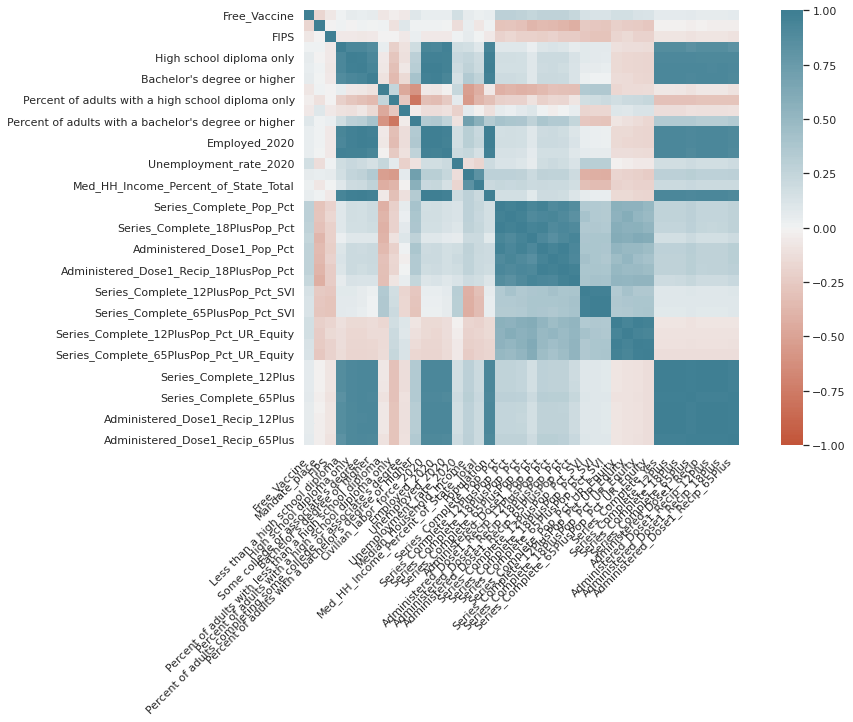

In [ ]:
corr = avgDataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
rcParams['figure.figsize'] = 20, 20

### Datewise - 

In [ ]:
covid_vaccine_df.info()

In [ ]:
modelling_df = covid_vaccine_df

In [ ]:
modelling_df.shape

In [ ]:
colsToDrop = ['FIPS', 
              'Recip_County', 
              'Recip_State', 
              'Metro_status', 
              'SVI_CTGY', 
              'MMWR_week', 
              'Series_Complete_Pop_Pct', 
              'Series_Complete_12Plus', 
              'Series_Complete_12PlusPop_Pct',
              'Series_Complete_18PlusPop_Pct', 
              'Series_Complete_18Plus',
              'Series_Complete_65PlusPop_Pct', 
              'Completeness_pct', 
              'Administered_Dose1_Pop_Pct', 
              'Administered_Dose1_Recip_12PlusPop_Pct', 
              'Administered_Dose1_Recip_12Plus',
              'Administered_Dose1_Recip_18PlusPop_Pct', 
              'Administered_Dose1_Recip_18Plus',
              'Administered_Dose1_Recip_65PlusPop_Pct', 
              'Administered_Dose1_Recip_65Plus',
              'Series_Complete_Pop_Pct_SVI', 
              'Series_Complete_18PlusPop_Pct_SVI',
              'Series_Complete_65PlusPop_Pct_SVI', 
              'Series_Complete_Pop_Pct_UR_Equity', 
              'Series_Complete_12PlusPop_Pct_UR_Equity', 
              'Series_Complete_18PlusPop_Pct_UR_Equity', 
              'Series_Complete_65PlusPop_Pct_UR_Equity',
              'Series_Complete_12PlusPop_Pct_SVI']
modelling_df = modelling_df.drop(columns = colsToDrop)

In [ ]:
modelling_df

In [ ]:
modelling_df.info()

Question 1: Counties who have already reached, 80% vaccination rate

In [ ]:
temp1 = covid_vaccine_df[covid_vaccine_df["Date"] == '2021-10-20']

In [ ]:
max_Series_Complete_12PlusPop_Pct = covid_vaccine_df["Series_Complete_12PlusPop_Pct"].max()
max_Series_Complete_12PlusPop_Pct

In [ ]:
temp2 = temp1[covid_vaccine_df["Series_Complete_Pop_Pct"] >= 80.0]
temp2

# state policies

In [ ]:
Finaldataset['Free_Vaccine'].unique()

array([0, 1])

In [ ]:
Finaldataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980201 entries, 0 to 980200
Data columns (total 52 columns):
 #   Column                                                           Non-Null Count   Dtype         
---  ------                                                           --------------   -----         
 0   Recip_State_x                                                    980201 non-null  object        
 1   Free_Vaccine                                                     980201 non-null  int64         
 2   Mandate_place                                                    980201 non-null  int64         
 3   FIPS                                                             980201 non-null  int64         
 4   Recip_County_x                                                   980201 non-null  object        
 5   Less than a high school diploma                                  980201 non-null  float64       
 6   High school diploma only                                         980

### Free vaccine

In [ ]:
counties_with_free_vaccine  = Finaldataset[Finaldataset['Free_Vaccine'] == 1]
counties_without_free_vaccine = Finaldataset[Finaldataset['Free_Vaccine'] == 0]

In [ ]:
temp1 = counties_with_free_vaccine.groupby(['FIPS']).max()
temp2 = counties_without_free_vaccine.groupby(['FIPS']).max()

In [ ]:
temp1 = temp1.sort_values(by=['Series_Complete_Pop_Pct'],  ascending=False)
temp2 = temp2.sort_values(by=['Series_Complete_Pop_Pct'],  ascending=False)

In [ ]:
len(temp1), len(temp2)

(607, 2534)

In [ ]:
len(temp1) + len(temp2)

3141

In [ ]:
df_temp = temp1.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nlargest(10)
df_temp

Recip_County_y
Santa Cruz County        90.1
San Juan County          86.4
West Feliciana Parish    81.3
Hamilton County          78.4
Leelanau County          77.2
Cumberland County        77.0
Montgomery County        76.8
Summit County            75.7
Hood River County        74.7
Knox County              74.6
Name: Series_Complete_Pop_Pct, dtype: float64

In [ ]:
df3= temp1.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nsmallest(10)
df3

Recip_County_y
Nantucket County      1.3
Dukes County          3.6
Barnstable County     5.2
Cameron Parish       15.8
Storey County        18.5
Crowley County       19.2
Bent County          23.1
Eureka County        23.4
St. Helena Parish    27.3
Spencer County       29.0
Name: Series_Complete_Pop_Pct, dtype: float64

In [ ]:
df3= temp2.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nlargest(10)
df3

Recip_County_y
McKinley County         100.0
Chattahoochee County     99.9
Bristol Bay Borough      91.4
Martin County            84.2
Portsmouth city          81.5
Teton County             80.5
Marin County             77.7
Middlesex County         75.6
Santa Clara County       75.0
Summit County            74.9
Name: Series_Complete_Pop_Pct, dtype: float64

In [ ]:
df3= temp2.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nsmallest(10)
df3

Recip_County_y
Alpine County      0.0
Andrews County     0.0
Angelina County    0.0
Aransas County     0.0
Archer County      0.0
Atascosa County    0.0
Austin County      0.0
Bailey County      0.0
Bandera County     0.0
Bastrop County     0.0
Name: Series_Complete_Pop_Pct, dtype: float64

In [ ]:
columns=["Series_Complete_Pop_Pct","Percent of adults with a high school diploma only", 'Percent of adults completing some college or associate\'s degree', 
         "Percent of adults with a bachelor's degree or higher"]
df_heatmap=counties_with_free_vaccine[columns].corr(method='pearson')

ax = sns.heatmap(df_heatmap, yticklabels = columns, xticklabels = columns,  annot = True)

### Mandate

In [ ]:
Finaldataset['Mandate_place'].unique()

array([3, 1, 2])

In [ ]:
counties_with_mandate_1 = Finaldataset[Finaldataset['Mandate_place'] == 1]
counties_with_mandate_2 = Finaldataset[Finaldataset['Mandate_place'] == 2]
counties_with_mandate_3 = Finaldataset[Finaldataset['Mandate_place'] == 3]

In [ ]:
counties_with_mandate_1 = counties_with_mandate_1.groupby(['FIPS']).max()
counties_with_mandate_2 = counties_with_mandate_2.groupby(['FIPS']).max()
counties_with_mandate_3 = counties_with_mandate_3.groupby(['FIPS']).max()

In [ ]:
len(counties_with_mandate_1), len(counties_with_mandate_2), len(counties_with_mandate_3)

(1270, 751, 1120)

In [ ]:
len(counties_with_mandate_1) +  len(counties_with_mandate_2) +len(counties_with_mandate_3)

3141

In [ ]:
df3= counties_with_mandate_1.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nsmallest(10)
df3

Recip_County_y
Doddridge County      4.3
Roane County          5.2
Wirt County           6.2
Upshur County         8.4
Wetzel County        10.6
Braxton County       12.2
Pleasants County     13.6
Monongalia County    15.7
Cameron Parish       15.8
Summers County       17.7
Name: Series_Complete_Pop_Pct, dtype: float64

In [ ]:
df3= counties_with_mandate_1.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nlargest(10)
df3

Recip_County_y
Martin County            84.2
West Feliciana Parish    81.3
Teton County             80.5
Hamilton County          78.4
Bayfield County          74.4
Dane County              73.5
New York County          73.0
Queens County            72.8
Door County              71.0
Tompkins County          70.9
Name: Series_Complete_Pop_Pct, dtype: float64

In [ ]:
df3= counties_with_mandate_2.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nsmallest(10)
df3

Recip_County_y
Alpine County      0.0
Hawaii County      0.0
Honolulu County    0.0
Inyo County        0.0
Kauai County       0.0
Mariposa County    0.0
Maui County        0.0
Modoc County       0.0
Mono County        0.0
Plumas County      0.0
Name: Series_Complete_Pop_Pct, dtype: float64

In [ ]:
df3= counties_with_mandate_2.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nlargest(10)
df3

Recip_County_y
McKinley County       100.0
San Juan County        86.4
Portsmouth city        81.5
Marin County           77.7
Cumberland County      77.0
Montgomery County      76.8
Summit County          75.7
Middlesex County       75.6
Santa Clara County     75.0
Hood River County      74.7
Name: Series_Complete_Pop_Pct, dtype: float64

In [ ]:
df3= counties_with_mandate_3.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nsmallest(10)
df3

Recip_County_y
Andrews County      0.0
Angelina County     0.0
Aransas County      0.0
Archer County       0.0
Armstrong County    0.0
Atascosa County     0.0
Austin County       0.0
Bailey County       0.0
Bandera County      0.0
Bastrop County      0.0
Name: Series_Complete_Pop_Pct, dtype: float64

In [ ]:
df3= counties_with_mandate_3.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nlargest(10)
df3

Recip_County_y
Chattahoochee County    99.9
Bristol Bay Borough     91.4
Santa Cruz County       90.1
Leelanau County         77.2
Summit County           74.9
Sumter County           74.7
Miami-Dade County       74.6
Rosebud County          72.6
Apache County           72.4
Blaine County           72.3
Name: Series_Complete_Pop_Pct, dtype: float64

### SVI

In [ ]:
Finaldataset['SVI_CTGY'].unique()

array(['C', 'B', 'D', 'A'], dtype=object)

In [ ]:
counties_SVI_CTGY_a = Finaldataset[Finaldataset['SVI_CTGY'] == 'A']
counties_SVI_CTGY_b = Finaldataset[Finaldataset['SVI_CTGY'] == 'B']
counties_SVI_CTGY_c = Finaldataset[Finaldataset['SVI_CTGY'] == 'C']
counties_SVI_CTGY_d = Finaldataset[Finaldataset['SVI_CTGY'] == 'D']

In [ ]:
counties_SVI_CTGY_a = counties_SVI_CTGY_a.groupby(['FIPS']).max()
counties_SVI_CTGY_b = counties_SVI_CTGY_b.groupby(['FIPS']).max()
counties_SVI_CTGY_c = counties_SVI_CTGY_c.groupby(['FIPS']).max()
counties_SVI_CTGY_d = counties_SVI_CTGY_d.groupby(['FIPS']).max()

In [ ]:
len(counties_SVI_CTGY_a), len(counties_SVI_CTGY_b), len(counties_SVI_CTGY_c), len(counties_SVI_CTGY_d)

(787, 784, 785, 785)

In [ ]:
len(counties_SVI_CTGY_a) + len(counties_SVI_CTGY_b) + len(counties_SVI_CTGY_c) + len(counties_SVI_CTGY_d)

3141

In [ ]:
df3= counties_SVI_CTGY_a.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nsmallest(10)
df3

Recip_County_y
Archer County       0.0
Baylor County       0.0
Borden County       0.0
Carson County       0.0
Collin County       0.0
Comal County        0.0
Denton County       0.0
Glasscock County    0.0
Irion County        0.0
King County         0.0
Name: Series_Complete_Pop_Pct, dtype: float64

In [ ]:
df3= counties_SVI_CTGY_a.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nlargest(10)
df3

Recip_County_y
San Juan County      86.4
Teton County         80.5
Leelanau County      77.2
Cumberland County    77.0
Summit County        75.7
Middlesex County     75.6
Sumter County        74.7
Knox County          74.6
Bayfield County      74.4
Howard County        74.4
Name: Series_Complete_Pop_Pct, dtype: float64

In [ ]:
df3= counties_SVI_CTGY_b.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nsmallest(10)
df3

Recip_County_y
Andrews County     0.0
Austin County      0.0
Blanco County      0.0
Briscoe County     0.0
Callahan County    0.0
Chambers County    0.0
Coleman County     0.0
Concho County      0.0
Crane County       0.0
Donley County      0.0
Name: Series_Complete_Pop_Pct, dtype: float64

In [ ]:
df3= counties_SVI_CTGY_b.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nlargest(10)
df3

Recip_County_y
Bristol Bay Borough     91.4
Hamilton County         78.4
Marin County            77.7
Montgomery County       76.8
Santa Clara County      75.0
San Francisco County    74.3
San Mateo County        72.5
Fairfield County        71.7
King County             71.2
Montour County          71.1
Name: Series_Complete_Pop_Pct, dtype: float64

In [ ]:
df3= counties_SVI_CTGY_c.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nsmallest(10)
df3

Recip_County_y
Alpine County      0.0
Bandera County     0.0
Bastrop County     0.0
Bosque County      0.0
Brazoria County    0.0
Brazos County      0.0
Brewster County    0.0
Brown County       0.0
Burleson County    0.0
Burnet County      0.0
Name: Series_Complete_Pop_Pct, dtype: float64

In [ ]:
df3= counties_SVI_CTGY_c.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nlargest(10)
df3

Recip_County_y
Chattahoochee County        99.9
West Feliciana Parish       81.3
Hood River County           74.7
New York County             73.0
Queens County               72.8
Rosebud County              72.6
Franklin County             70.7
Westchester County          69.6
Mackinac County             69.4
Yakutat City and Borough    69.3
Name: Series_Complete_Pop_Pct, dtype: float64

In [ ]:
df3= counties_SVI_CTGY_d.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nsmallest(10)
df3

Recip_County_y
Anderson County    0.0
Angelina County    0.0
Aransas County     0.0
Atascosa County    0.0
Bailey County      0.0
Bee County         0.0
Bexar County       0.0
Bowie County       0.0
Caldwell County    0.0
Cameron County     0.0
Name: Series_Complete_Pop_Pct, dtype: float64

In [ ]:
df3= counties_SVI_CTGY_d.groupby("Recip_County_y")["Series_Complete_Pop_Pct"].max().nlargest(10)
df3

Recip_County_y
McKinley County      100.0
Santa Cruz County     90.1
Martin County         84.2
Portsmouth city       81.5
Miami-Dade County     74.6
Apache County         72.4
Blaine County         72.3
Glacier County        71.2
Big Horn County       70.9
Imperial County       68.8
Name: Series_Complete_Pop_Pct, dtype: float64

# Question 2: Do personal factors like age affect the vaccination rate

In [ ]:
covid_vaccine_df.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,2021-10-20,28161,42,Yalobusha County,MS,59.1,7154,7153.0,68.9,6850,72.6,2501,98.3,98.3,8034.0,66.4,8033.0,77.4,7657.0,81.1,2661.0,99.9,C,12.0,12.0,12.0,12.0,Non-metro,8.0,8.0,8.0,8.0
1,2021-10-20,13229,42,Pierce County,GA,24.4,4748,4748.0,29.0,4587,31.2,1742,51.3,57.6,5518.0,28.3,5518.0,33.7,5312.0,36.1,1916.0,56.4,C,9.0,9.0,10.0,11.0,Non-metro,5.0,5.0,6.0,7.0
2,2021-10-20,27169,42,Winona County,MN,53.2,26839,26776.0,59.9,25094,60.4,7943,89.3,94.0,29743.0,58.9,29663.0,66.4,27899.0,67.2,8820.0,99.1,A,4.0,4.0,4.0,4.0,Non-metro,8.0,8.0,8.0,8.0
3,2021-10-20,19083,42,Hardin County,IA,50.5,8510,8510.0,57.6,8196,60.5,3258,85.7,97.5,8937.0,53.1,8937.0,60.5,8555.0,63.1,3297.0,86.7,A,4.0,4.0,4.0,4.0,Non-metro,8.0,8.0,8.0,8.0
4,2021-10-20,55027,42,Dodge County,WI,46.3,40685,40685.0,52.7,38675,54.7,13395,83.7,97.0,43365.0,49.4,43364.0,56.2,41046.0,58.1,13825.0,86.4,A,3.0,4.0,4.0,4.0,Non-metro,7.0,8.0,8.0,8.0


Columns to consider for age - 

1. Series_Complete_12Plus
2. Series_Complete_18Plus	
3. Series_Complete_65Plus

4. Administered_Dose1_Recip_12Plus
5. Administered_Dose1_Recip_18Plus
6. Administered_Dose1_Recip_65Plus


# Step 1: taking one particular county -> 28161

# Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


In [ ]:
modelling_df

,Date,Series_Complete_Yes,Series_Complete_65Plus,Administered_Dose1_Recip
0,2021-10-20,7154,2501,8034.0
1,2021-10-20,4748,1742,5518.0
2,2021-10-20,26839,7943,29743.0
3,2021-10-20,8510,3258,8937.0
4,2021-10-20,40685,13395,43365.0
...,...,...,...,...
1023983,2020-12-13,0,0,0.0
1023984,2020-12-13,0,0,0.0
1023985,2020-12-13,0,0,0.0
1023986,2020-12-13,0,0,0.0


In [ ]:
modelling_df['Date-Month'] = modelling_df['Date'].dt.strftime('%Y-%m')

In [ ]:
modelling_df['Date-Month'] .unique()

array(['2021-10', '2021-09', '2021-08', '2021-07', '2021-06', '2021-05',
       '2021-04', '2021-03', '2021-02', '2021-01', '2020-12'],
      dtype=object)

In [ ]:
validDataframe_temp = modelling_df[modelling_df['Date-Month'].isin(['2021-10', '2021-09'])]
train_temp = modelling_df[~modelling_df['Date-Month'].isin(['2021-10', '2021-09'])]

In [ ]:
train_temp['Date-Month'].unique()

array(['2021-08', '2021-07', '2021-06', '2021-05', '2021-04', '2021-03',
       '2021-02', '2021-01', '2020-12'], dtype=object)

In [ ]:
validDataframe_temp['Date-Month'].unique()

array(['2021-10', '2021-09'], dtype=object)

In [ ]:
reg.coef_

array([[3.81936333]])

In [ ]:
reg.intercept_

array([-4670.38438945])

In [ ]:
yTrain = train_temp.drop(columns = ['Series_Complete_65Plus', 'Date', 'Date-Month', 'Administered_Dose1_Recip'])
yTest = validDataframe_temp.drop(columns = ['Series_Complete_65Plus', 'Date', 'Date-Month', 'Administered_Dose1_Recip'])

xTrain = train_temp.drop(columns = ['Series_Complete_Yes', 'Date-Month', 'Administered_Dose1_Recip', 'Date'])
xTest = validDataframe_temp.drop(columns = ['Series_Complete_Yes', 'Date-Month', 'Administered_Dose1_Recip', 'Date'])


In [ ]:
reg = LinearRegression().fit(xTrain, yTrain)

In [ ]:
reg.score(xTrain, yTrain)

0.9220207013419365

In [ ]:
yPred = reg.predict(xTest)

In [ ]:
yPred

array([[ 4881.84330482],
       [ 1982.94653555],
       [25666.81855961],
       ...,
       [12711.53813619],
       [43587.27131512],
       [27530.66786581]])

In [ ]:
yTest = np.array(yTest)

In [ ]:
type(yPred), type(yTest)

(numpy.ndarray, numpy.ndarray)

In [ ]:
yPred.shape

(161200, 1)

In [ ]:
yTest.shape

(161200, 1)

In [ ]:
reg.predict(np.array(yTest))

array([[ 22653.34089036],
       [ 13463.95271267],
       [ 97837.50808818],
       ...,
       [ 60724.75458749],
       [151740.18279801],
       [ 93964.67366916]])

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error: %.2f'% metrics.mean_absolute_error( yTest , yPred))
print('Mean Squared Error: %.2f'% metrics.mean_squared_error(yTest, yPred))
print('Root Mean Squared Error: %.2f' % np.sqrt(metrics.mean_squared_error(yTest, yPred)))
print("R2-score: %.2f" % r2_score(yTest , yPred) )

Mean Absolute Error: 11135.10"
Mean Squared Error: 2376037402.76"
Root Mean Squared Error: 48744.61"
R2-score: 0.93


In [ ]:


test_x = np.asanyarray(initial_data[['Series_Complete_Pop_Pct']])
test_y = np.asanyarray(initial_data[['Series_Complete_Yes']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))


In [ ]:
data = {
    'yPred': yPred,
    'yTest': yTest}

In [ ]:
data

{'yPred': array([[ 4881.84330482],
        [ 1982.94653555],
        [25666.81855961],
        ...,
        [12711.53813619],
        [43587.27131512],
        [27530.66786581]]), 'yTest': array([[ 7154],
        [ 4748],
        [26839],
        ...,
        [17122],
        [40952],
        [25825]])}

In [ ]:
data['yPred']

array([[ 4881.84330482],
       [ 1982.94653555],
       [25666.81855961],
       ...,
       [12711.53813619],
       [43587.27131512],
       [27530.66786581]])

In [ ]:
data = np.append(yPred, yTest, axis=1)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,0,1
0,4881.843305,7154.0
1,1982.946536,4748.0
2,25666.818560,26839.0
3,7773.101347,8510.0
4,46489.987448,40685.0
...,...,...
161195,351832.808418,289251.0
161196,1807.255822,4677.0
161197,12711.538136,17122.0
161198,43587.271315,40952.0


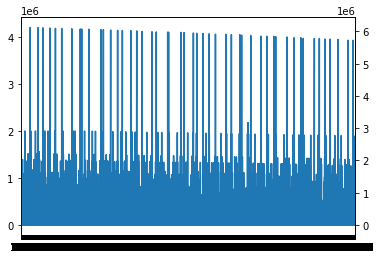

In [ ]:
df[0].plot(kind='bar', width = 10)
df[1].plot(secondary_y=True)

# Questions

## Question 1: Top 20 counties done with double dose of the vaccination

In [ ]:
top20DoubleDoseComplete = avgDataset.nlargest(5, 'Series_Complete_Pop_Pct')

In [ ]:
top20DoubleDoseComplete

,Recip_State,Free_Vaccine,Mandate_place,FIPS,Recip_County,Less than a high school diploma,High school diploma only,Some college or associate's degree,Bachelor's degree or higher,Percent of adults with less than a high school diploma,Percent of adults with a high school diploma only,Percent of adults completing some college or associate's degree,Percent of adults with a bachelor's degree or higher,State,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income,Med_HH_Income_Percent_of_State_Total,Population,MMWR_week,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
412,GA,0,3,13053,Chattahoochee County,293.0,1452.0,1867.0,1510.0,5.7,28.3,36.5,29.5,GA,1988.0,1864.0,124.0,6.2,46106.0,74.4,9565.0,23.355769,72.294551,15951.766026,15951.019231,75.061859,15547.900641,75.856090,1207.413462,79.130769,44.541346,19957.698718,77.973077,19955.509615,80.115385,19314.320513,80.745833,1479.538462,84.053846,11.913462,11.983974,11.996795,10.637821,3.913462,3.983974,3.996795,4.224359
1947,NM,0,2,35031,McKinley County,10059.0,15197.0,13898.0,5054.0,22.8,34.4,31.4,11.4,NM,24035.0,21557.0,2478.0,10.3,36404.0,70.0,72902.0,23.355769,55.746154,39796.310897,39787.256410,62.762500,35622.951923,64.522115,7518.592949,70.410256,60.865064,46062.419872,63.122115,46036.301282,68.587179,40869.310897,70.408974,8819.224359,78.624679,14.919872,15.041667,15.070513,14.445513,6.919872,7.041667,7.070513,7.291667
4,AK,0,3,2060,Bristol Bay Borough,38.0,235.0,219.0,143.0,6.0,37.0,34.5,22.5,AK,417.0,386.0,31.0,7.4,87950.0,113.9,844.0,23.355769,54.083654,452.125000,451.272436,61.985897,436.551282,62.740385,89.250000,65.626923,78.708013,567.612179,63.921795,561.173077,67.175641,541.067308,67.753205,93.464744,68.728205,8.496795,8.612179,8.641026,7.121795,6.958333,7.073718,7.102564,7.698718
2000,NY,1,1,36041,Hamilton County,804.0,969.0,1193.0,601.0,22.5,27.2,33.4,16.8,NY,2141.0,1972.0,169.0,7.9,60148.0,83.5,5107.0,23.355769,50.596795,2234.483974,2234.483974,54.847115,2195.125000,57.571795,1017.467949,72.204808,83.020192,2639.189103,59.766346,2639.189103,64.780449,2588.179487,67.877244,1197.766026,81.541667,8.182692,8.250000,8.269231,7.099359,7.028846,7.096154,7.115385,7.532051
1711,NC,0,1,37117,Martin County,2745.0,5590.0,5455.0,2705.0,16.6,33.9,33.1,16.4,NC,8884.0,8267.0,617.0,6.9,39413.0,68.7,22031.0,23.355769,49.446795,11095.823718,11091.259615,57.009295,10880.025641,60.659936,4898.564103,75.215705,88.250962,13600.201923,60.605449,13590.698718,68.372115,13278.144231,71.461538,5720.272436,84.279487,14.929487,15.003205,15.028846,14.458333,6.929487,7.003205,7.028846,7.445513


In [ ]:
top20DoubleDoseComplete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 412 to 1711
Data columns (total 47 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Recip_State                                                      5 non-null      object 
 1   Free_Vaccine                                                     5 non-null      int64  
 2   Mandate_place                                                    5 non-null      int64  
 3   FIPS                                                             5 non-null      int64  
 4   Recip_County                                                     5 non-null      object 
 5   Less than a high school diploma                                  5 non-null      float64
 6   High school diploma only                                         5 non-null      float64
 7   Some college or associate's degree         

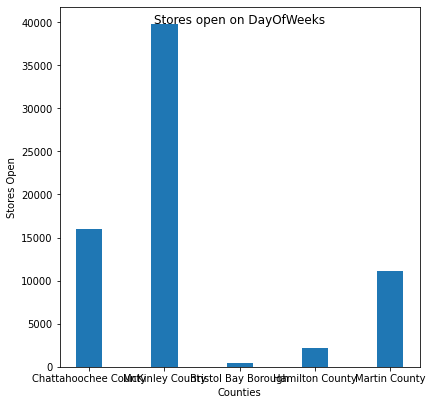

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(top20DoubleDoseComplete['Recip_County'],top20DoubleDoseComplete['Series_Complete_Yes'], width = 0.35)
fig.suptitle('Stores open on DayOfWeeks')
plt.xlabel('Counties')
plt.ylabel('Stores Open')
plt.show()

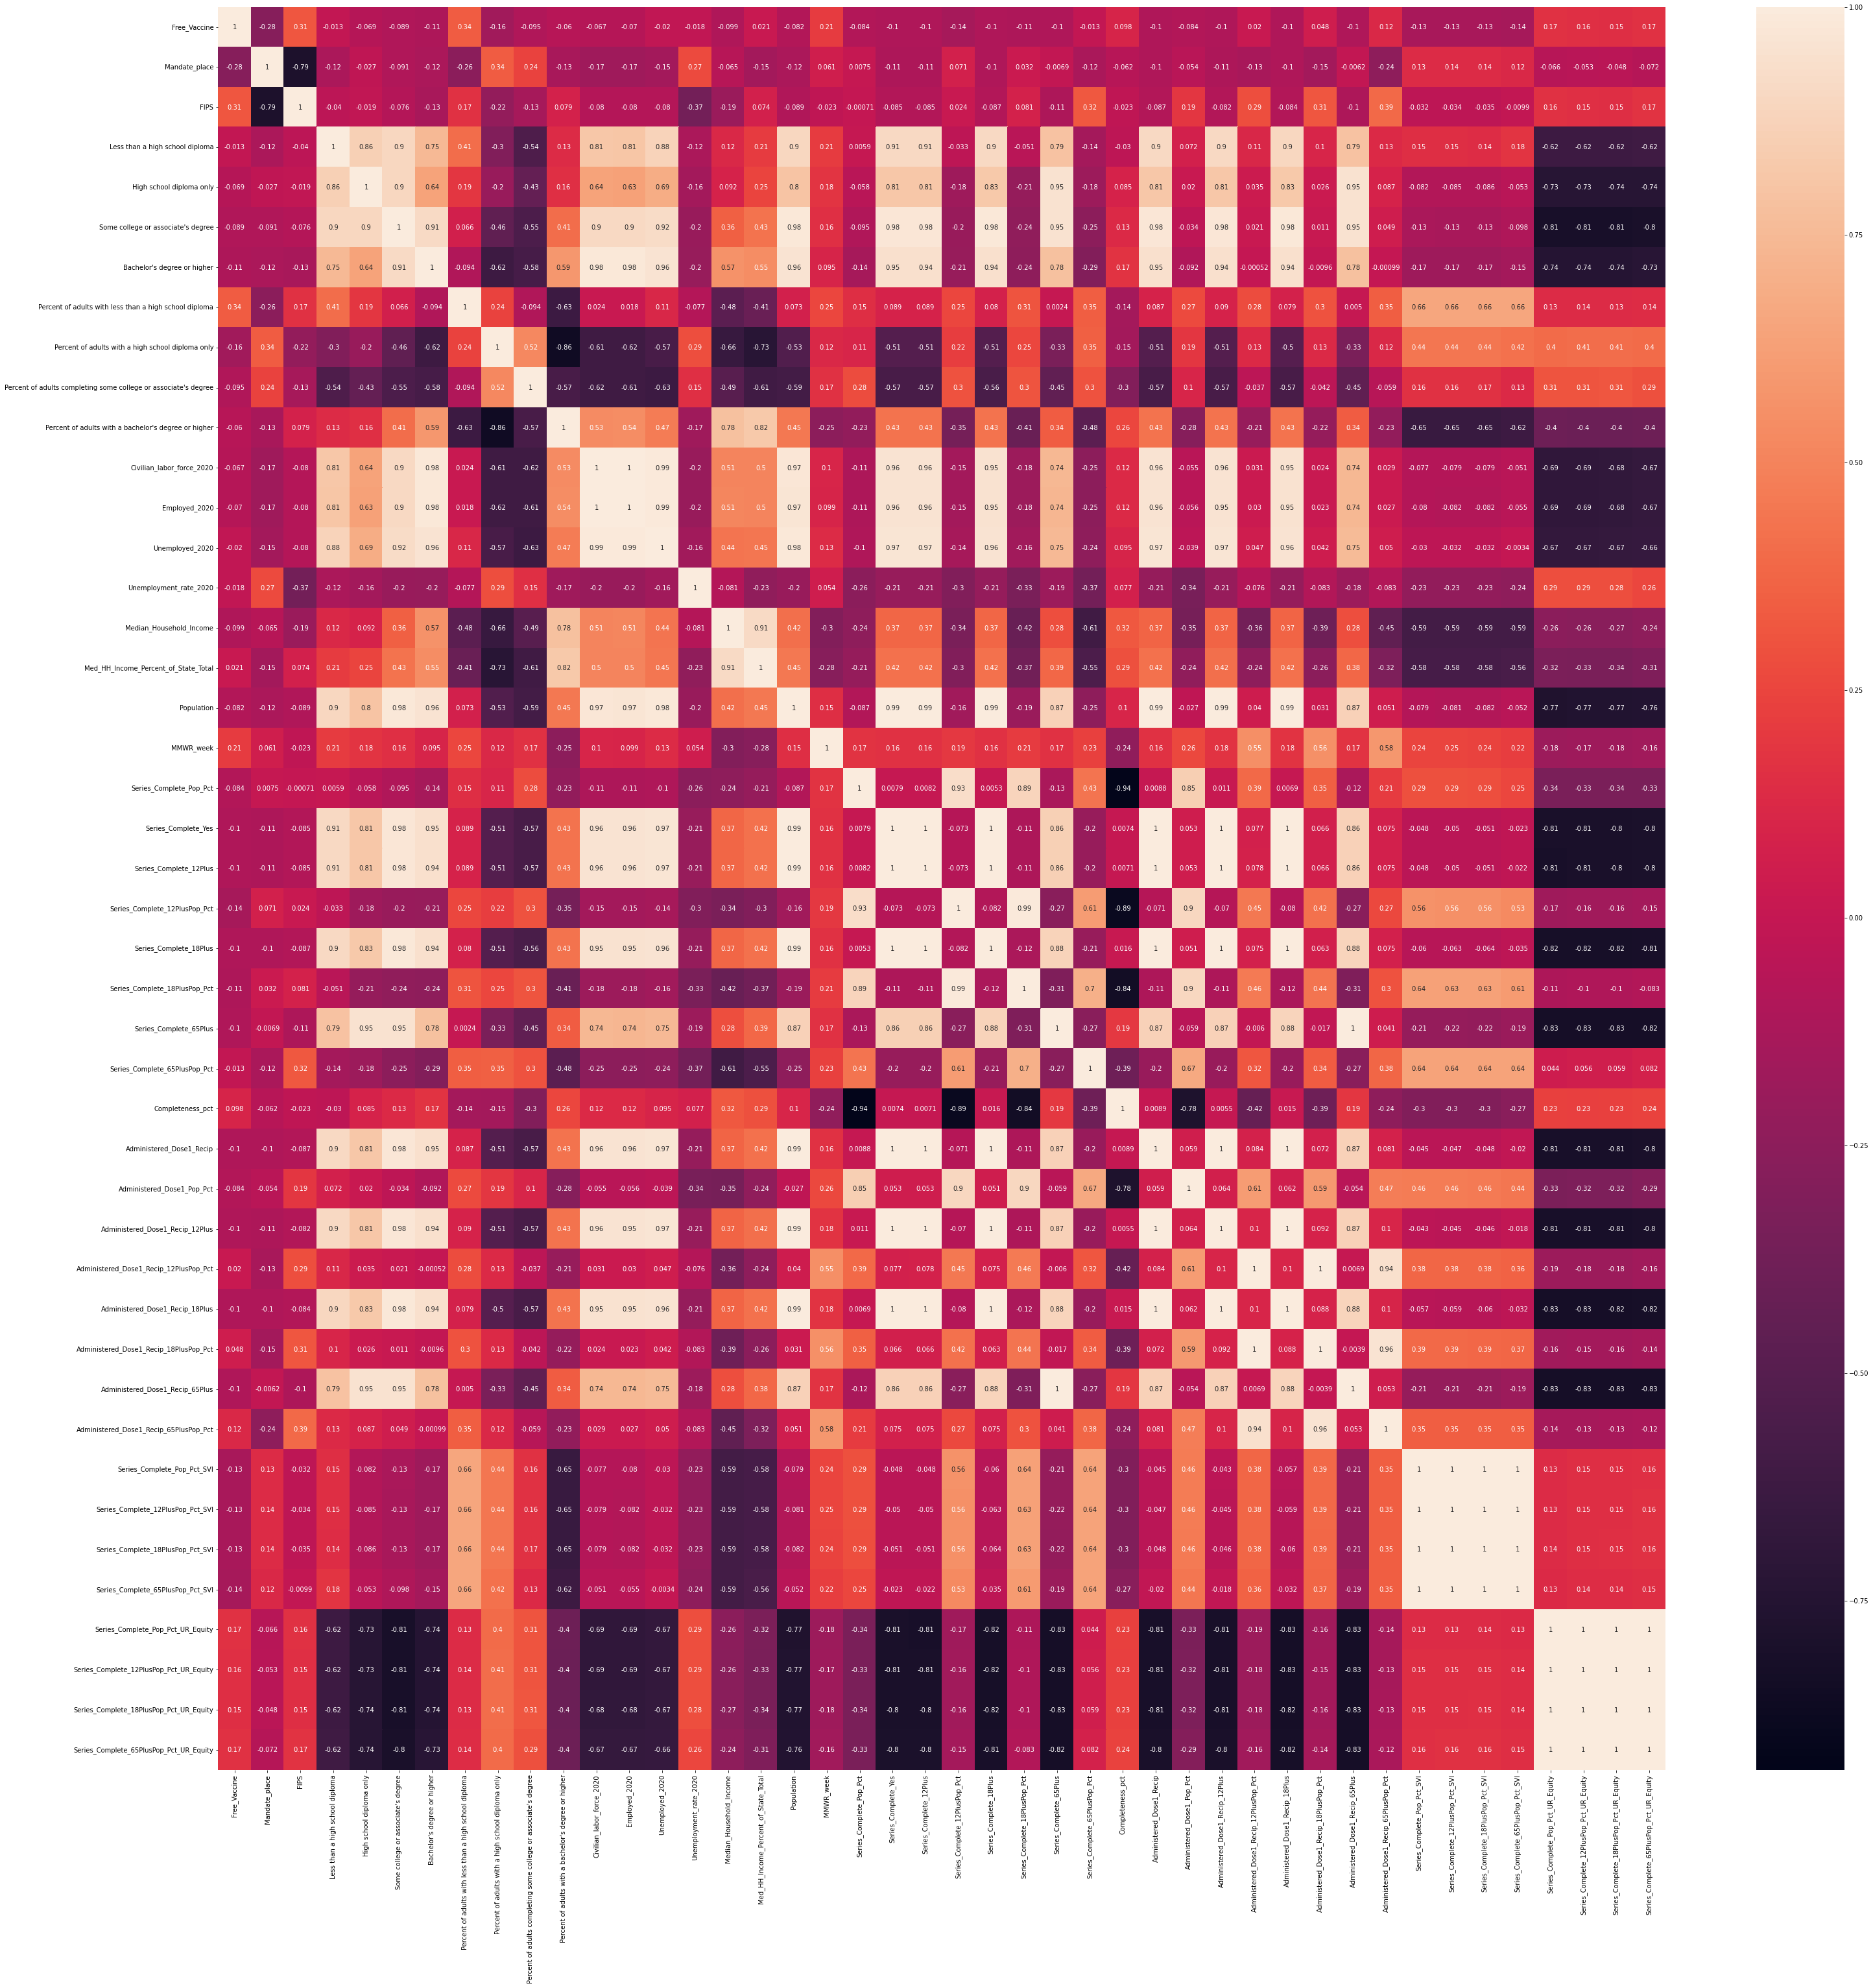

In [ ]:
f = plt.figure(figsize=(50, 50))
df_heatmap=top20DoubleDoseComplete[c].corr(method='pearson')

ax = sns.heatmap(df_heatmap, yticklabels = c, xticklabels = c,  annot = True)

# Facts:

1. Looks like few counties, data for vaccine count given to 12+ age is not provided. - handling by placing 0 there.

In [ ]:
covid_vaccine_df['Administered_Dose1_Recip']

0          8034.0
1          5518.0
2         29743.0
3          8937.0
4         43365.0
           ...   
957004      358.0
960860    14387.0
961495      340.0
963148      325.0
964169    13928.0
Name: Administered_Dose1_Recip, Length: 733201, dtype: float64

In [ ]:
# covid_vaccine_df.groupby("Recip_County", 'Administered_Dose1_Recip').mean()
covid_vaccine_df.groupby(['Recip_County']).max()

,Date,FIPS,MMWR_week,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
Recip_County,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abbeville County,2021-10-20,45001,53,SC,35.9,8809,8808.0,41.0,8495,43.2,3487,63.6,95.1,9683.0,39.5,9678.0,45.0,9309.0,47.3,3694.0,67.4,D,14.0,15.0,15.0,15.0,Non-metro,6.0,7.0,7.0,7.0
Acadia Parish,2021-10-20,22001,53,LA,47.1,29212,29209.0,56.6,27890,60.6,8805,89.9,98.2,32517.0,52.4,32514.0,63.0,30975.0,67.3,9324.0,95.2,D,15.0,16.0,16.0,16.0,Metro,3.0,4.0,4.0,4.0
Accomack County,2021-10-20,51001,53,VA,63.3,20464,20459.0,73.4,19509,76.1,7140,90.0,84.2,22760.0,70.4,22748.0,81.6,21624.0,84.4,7506.0,94.6,D,16.0,16.0,16.0,16.0,Non-metro,8.0,8.0,8.0,8.0
Ada County,2021-10-20,16001,53,ID,51.5,247959,NaN,NaN,247888,67.0,65778,91.4,99.6,272253.0,56.5,NaN,NaN,272112.0,73.6,69311.0,96.3,A,4.0,NaN,4.0,4.0,Metro,4.0,NaN,4.0,4.0
Adair County,2021-10-20,40001,53,OK,44.5,10382,10382.0,52.0,9940,54.1,2895,75.6,97.7,11345.0,47.5,11343.0,55.6,10837.0,57.8,3071.0,80.2,D,13.0,14.0,14.0,15.0,Non-metro,7.0,8.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yukon-Koyukuk Census Area,2021-10-20,02290,53,AK,61.4,3209,3198.0,76.4,2889,76.6,697,84.8,98.6,3529.0,67.5,3504.0,83.7,3168.0,84.0,740.0,90.0,D,16.0,16.0,16.0,16.0,Non-metro,8.0,8.0,8.0,8.0
Yuma County,2021-10-20,08125,53,CO,57.7,123253,123230.0,69.3,112986,70.5,29329,71.0,99.0,141976.0,66.4,141915.0,79.8,129135.0,80.6,32772.0,79.3,D,16.0,16.0,16.0,16.0,Non-metro,6.0,7.0,8.0,7.0
Zapata County,2021-10-20,48505,53,TX,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN


# Question 1:

How many counties have below 10% of percentage vaccinated

In [ ]:
counties = np.array(covid_vaccine_df['Recip_County'].unique())
latestDateDataset = covid_vaccine_df.loc[covid_vaccine_df['Date'] == '2021-10-20']
latestDateDataset['Administered_Dose1_Pop_Pct'] = latestDateDataset['Administered_Dose1_Pop_Pct'].fillna(0)
latestDateDataset['Series_Complete_Pop_Pct'] = latestDateDataset['Series_Complete_Pop_Pct'].fillna(0)
latestDateDatasetVaccine = []
for county in counties:
  latestDateDatasetVaccine.append(latestDateDataset.loc[latestDateDataset['Recip_County'] == county][['Administered_Dose1_Recip', 'Series_Complete_Pop_Pct']].values[0])
latestDateDatasetVaccine = np.array(latestDateDatasetVaccine)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
latestDateDatasetVaccine = latestDateDatasetVaccine.astype(np.int)

In [ ]:
type(latestDateDatasetVaccine[0][0]), type(latestDateDatasetVaccine[0][1])

(numpy.int64, numpy.int64)

In [ ]:
latestDateDatasetVaccine

array([[ 8034,    59],
       [ 5518,    24],
       [29743,    53],
       ...,
       [ 7334,    32],
       [    0,    30],
       [    0,     0]])

In [ ]:
# print(Series_Complete_Yes.shape, counties.shape)
# latestDateDatasetVaccine = latestDateDatasetVaccine.reshape(1959, 1)
counties = counties.reshape(1959, 1)
# print(latestDateDatasetVaccine.shape, counties.shape)
latestDateDatasetVaccine = np.concatenate((counties, latestDateDatasetVaccine), axis = 1)

In [ ]:
latestDateDatasetVaccine

array([['Yalobusha County', 8034, 7154],
       ['Pierce County', 5518, 4748],
       ['Winona County', 29743, 26839],
       ...,
       ['Franklin Parish', 7334, 6584],
       ['Hitchcock County', 0, 840],
       ['Collin County', 0, 0]], dtype=object)

In [ ]:
latestDateDatasetVaccine[:10]

array([['Yalobusha County', 8034, 7154],
       ['Pierce County', 5518, 4748],
       ['Winona County', 29743, 26839],
       ['Hardin County', 8937, 8510],
       ['Dodge County', 43365, 40685],
       ['Charles Mix County', 4837, 3960],
       ['Knox County', 11293, 10098],
       ["Prince George's County", 645893, 568539],
       ['Talladega County', 31755, 25913],
       ['Floyd County', 7941, 7569]], dtype=object)

In [ ]:
series = latestDateDatasetVaccine[np.argsort(latestDateDatasetVaccine[:, 1])]
# series = series[::-1]

In [ ]:
series[100:200]

array([['Nance County', 0, 939],
       ['Maui County', 0, 0],
       ['Leon County', 0, 0],
       ['Refugio County', 0, 0],
       ['Mono County', 0, 0],
       ['Socorro County', 0, 8983],
       ['Aransas County', 0, 0],
       ['Jim Wells County', 0, 0],
       ['Hooker County', 0, 265],
       ['Crane County', 0, 0],
       ['Red Willow County', 0, 3536],
       ['Coleman County', 0, 0],
       ['Roosevelt County', 0, 5188],
       ['Throckmorton County', 0, 0],
       ['Hays County', 0, 0],
       ['Carson County', 0, 0],
       ['Austin County', 0, 0],
       ['Keith County', 0, 2612],
       ['Lipscomb County', 0, 0],
       ['Lavaca County', 0, 0],
       ['Palo Pinto County', 0, 0],
       ['Kaufman County', 0, 0],
       ['Antelope County', 0, 2158],
       ['Foard County', 0, 0],
       ['Beadle County', 0, 6885],
       ['Bee County', 0, 0],
       ['Maverick County', 0, 0],
       ['Harding County', 0, 231],
       ['Red River County', 0, 0],
       ['Nemaha County', 0, 

In [ ]:
admin = latestDateDatasetVaccine[np.argsort(latestDateDatasetVaccine[:, 2])]
admin[:100]

array([['Collin County', 0, 0],
       ['Houston County', 0, 0],
       ['Grimes County', 0, 0],
       ['Randall County', 0, 0],
       ['Hawaii County', 0, 0],
       ['Schleicher County', 0, 0],
       ['Fannin County', 0, 0],
       ['Hockley County', 0, 0],
       ['Hall County', 0, 0],
       ['Kaufman County', 0, 0],
       ['La Salle County', 0, 0],
       ['Dallas County', 0, 0],
       ['Deaf Smith County', 0, 0],
       ['Bee County', 0, 0],
       ['Comal County', 0, 0],
       ['Rains County', 0, 0],
       ['Hays County', 0, 0],
       ['Hemphill County', 0, 0],
       ['Red River County', 0, 0],
       ['Alpine County', 0, 0],
       ['Nacogdoches County', 0, 0],
       ['Galveston County', 0, 0],
       ['Maverick County', 0, 0],
       ['Hudspeth County', 0, 0],
       ['Menard County', 0, 0],
       ['Hill County', 0, 0],
       ['Bowie County', 0, 0],
       ['Kleberg County', 0, 0],
       ['Bosque County', 0, 0],
       ['Kenedy County', 0, 0],
       ['Mariposa Co

# Vaccination VS population

In [ ]:
population_df = pd.read_csv('county_population.csv', low_memory = False)

In [ ]:
population_df

,fips,Name,Population
0,17000,Illinois,"1,28,12,508"
1,17001,Adams,"65,737"
2,17003,Alexander,"5,240"
3,17005,Bond,"16,725"
4,17007,Boone,"53,448"
...,...,...,...
3274,6107,Tulare,"4,73,117"
3275,6109,Tuolumne,"55,620"
3276,6111,Ventura,"8,43,843"
3277,6113,Yolo,"2,16,403"


In [ ]:
covid_vaccine_df

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,2021-10-20,28161,42,Yalobusha County,MS,59.1,7154,7153.0,68.9,6850,72.6,2501,98.3,98.3,8034.0,66.4,8033.0,77.4,7657.0,81.1,2661.0,99.9,C,12.0,12.0,12.0,12.0,Non-metro,8.0,8.0,8.0,8.0
1,2021-10-20,13229,42,Pierce County,GA,24.4,4748,4748.0,29.0,4587,31.2,1742,51.3,57.6,5518.0,28.3,5518.0,33.7,5312.0,36.1,1916.0,56.4,C,9.0,9.0,10.0,11.0,Non-metro,5.0,5.0,6.0,7.0
2,2021-10-20,27169,42,Winona County,MN,53.2,26839,26776.0,59.9,25094,60.4,7943,89.3,94.0,29743.0,58.9,29663.0,66.4,27899.0,67.2,8820.0,99.1,A,4.0,4.0,4.0,4.0,Non-metro,8.0,8.0,8.0,8.0
3,2021-10-20,19083,42,Hardin County,IA,50.5,8510,8510.0,57.6,8196,60.5,3258,85.7,97.5,8937.0,53.1,8937.0,60.5,8555.0,63.1,3297.0,86.7,A,4.0,4.0,4.0,4.0,Non-metro,8.0,8.0,8.0,8.0
4,2021-10-20,55027,42,Dodge County,WI,46.3,40685,40685.0,52.7,38675,54.7,13395,83.7,97.0,43365.0,49.4,43364.0,56.2,41046.0,58.1,13825.0,86.4,A,3.0,4.0,4.0,4.0,Non-metro,7.0,8.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023983,2020-12-13,36107,51,Tioga County,NY,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1023984,2020-12-13,38055,51,McLean County,ND,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
1023985,2020-12-13,51550,51,Chesapeake city,VA,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1023986,2020-12-13,25015,51,Hampshire County,MA,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN


In [ ]:
population_df["fips"] = pd.to_numeric(population_df["fips"], errors='coerce')

In [ ]:
covid_vaccine_df["FIPS"] = pd.to_numeric(covid_vaccine_df["FIPS"], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
type(covid_vaccine_df['FIPS'][0]), type(population_df['fips'][0])

(numpy.int64, numpy.int64)

In [ ]:
population_df.shape, covid_vaccine_df.shape

((3279, 3), (1006101, 32))

In [ ]:
latestDateDataset = covid_vaccine_df.loc[covid_vaccine_df['Date'] == '2021-10-20']

In [ ]:
latestDateDataset.shape

(3224, 32)

In [ ]:
# merge geo spatial data and percentage data
fullData = population_df.merge(latestDateDataset, left_on=['fips'], right_on=['FIPS'])

In [ ]:
fullData.shape

(3220, 35)

In [ ]:
fullData

,fips,Name,Population,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,17001,Adams,"65,737",2021-10-20,17001,42,Adams County,IL,45.0,29478,29448.0,52.9,28182,55.6,10082,74.6,97.8,35667.0,54.5,35612.0,64.0,34085.0,67.3,12473.0,92.3,A,3.0,4.0,4.0,4.0,Non-metro,7.0,8.0,8.0,8.0
1,17003,Alexander,"5,240",2021-10-20,17003,42,Alexander County,IL,25.9,1490,1490.0,30.2,1464,32.7,636,47.7,97.8,1912.0,33.2,1911.0,38.7,1858.0,41.5,775.0,58.2,D,13.0,14.0,14.0,14.0,Metro,1.0,2.0,2.0,2.0
2,17005,Bond,"16,725",2021-10-20,17005,42,Bond County,IL,45.0,7386,7377.0,50.9,7056,53.1,2382,74.6,97.8,8923.0,54.3,8901.0,61.4,8475.0,63.8,2675.0,83.8,B,7.0,8.0,8.0,8.0,Metro,3.0,4.0,4.0,4.0
3,17007,Boone,"53,448",2021-10-20,17007,42,Boone County,IL,48.0,25689,25634.0,56.2,23648,58.5,6697,77.5,97.8,33164.0,61.9,33069.0,72.5,30300.0,75.0,8302.0,96.1,B,7.0,8.0,8.0,8.0,Metro,3.0,4.0,4.0,4.0
4,17009,Brown,"6,244",2021-10-20,17009,42,Brown County,IL,31.2,2050,2047.0,34.8,1976,35.7,706,76.3,97.8,2452.0,37.3,2446.0,41.6,2358.0,42.6,820.0,88.6,B,6.0,6.0,6.0,8.0,Non-metro,6.0,6.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,6107,Tulare,"4,73,117",2021-10-20,6107,42,Tulare County,CA,43.7,203801,203526.0,54.7,186641,57.6,40700,75.0,97.4,239867.0,51.5,239329.0,64.3,218599.0,67.5,45949.0,84.6,D,15.0,16.0,16.0,16.0,Metro,3.0,4.0,4.0,4.0
3216,6109,Tuolumne,"55,620",2021-10-20,6109,42,Tuolumne County,CA,52.6,28678,28650.0,59.1,27779,61.3,12722,86.5,97.4,36154.0,66.4,36095.0,74.4,34868.0,76.9,15200.0,99.9,B,8.0,8.0,8.0,8.0,Non-metro,8.0,8.0,8.0,8.0
3217,6111,Ventura,"8,43,843",2021-10-20,6111,42,Ventura County,CA,62.6,529235,528218.0,73.1,487654,74.4,117357,85.8,97.4,597335.0,70.6,595695.0,82.4,549336.0,83.9,133063.0,97.3,B,8.0,8.0,8.0,8.0,Metro,4.0,4.0,4.0,4.0
3218,6113,Yolo,"2,16,403",2021-10-20,6113,42,Yolo County,CA,60.1,132599,132219.0,69.3,122183,69.9,25724,90.2,97.4,149346.0,67.7,148792.0,78.0,137277.0,78.6,28909.0,99.9,C,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0


In [ ]:
covid_vaccine_df

# Education status VS Vaccination Rate:

In [ ]:
covid_vaccine_df_edu["FIPS"] = covid_vaccine_df_edu["FIPS"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data1 = covid_vaccine_df_edu[['Recip_County', 'FIPS', 'Series_Complete_Yes']].groupby(['Recip_County']).mean()

In [ ]:
data1["FIPS"] = data1["FIPS"].astype(int)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1755 entries, Abbeville County to Ziebach County
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 1755 non-null   int64  
 1   Series_Complete_Yes  1755 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 121.1+ KB


In [ ]:
data1

,FIPS,Series_Complete_Yes
Recip_County,,
Abbeville County,45001,5664.021277
Acadia Parish,22001,14995.593750
Accomack County,51001,11974.147059
Adair County,27323,4284.310409
Adams County,31987,17762.496906
...,...,...
York County,39649,73540.853333
Yuba County,6115,18279.309353
Yukon-Koyukuk Census Area,2290,2364.382143


In [ ]:
fullData = data1.merge(education_df, left_on=['FIPS'], right_on=['FIPS'])

In [ ]:
fullData

,FIPS,Series_Complete_Yes,State,Area name,Less than a high school diploma,High school diploma only,Some college or associate's degree,Bachelor's degree or higher,Percent of adults with less than a high school diploma,Percent of adults with a high school diploma only,Percent of adults completing some college or associate's degree,Percent of adults with a bachelor's degree or higher
0,45001,5664.021277,SC,Abbeville County,"3,141","5,825","5,485","2,667",18.3,34.0,32.0,15.6
1,22001,14995.593750,LA,Acadia Parish,"8,673","17,035","10,019","5,478",21.0,41.3,24.3,13.3
2,51001,11974.147059,VA,Accomack County,"4,360","8,633","5,938","4,576",18.5,36.7,25.3,19.5
3,50001,14271.412811,VT,Addison County,"1,654","7,403","6,295","10,068",6.5,29.1,24.8,39.6
4,72001,6368.358491,PR,Adjuntas Municipio,"4,352","3,272","2,805","2,120",34.7,26.1,22.4,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,30111,46321.059028,MT,Yellowstone County,"6,380","32,857","34,590","34,829",5.9,30.2,31.8,32.1
1388,6113,79757.754386,CA,Yolo County,"17,179","23,086","34,470","52,851",13.5,18.1,27.0,41.4
1389,6115,18279.309353,CA,Yuba County,"8,506","11,333","20,001","8,193",17.7,23.6,41.6,17.1
1390,2290,2364.382143,AK,Yukon-Koyukuk Census Area,483,"1,383","1,108",468,14.0,40.2,32.2,13.6


In [ ]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1391
Data columns (total 12 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   FIPS                                                             1392 non-null   int64  
 1   Series_Complete_Yes                                              1392 non-null   float64
 2   State                                                            1392 non-null   object 
 3   Area name                                                        1392 non-null   object 
 4   Less than a high school diploma                                  1392 non-null   object 
 5   High school diploma only                                         1392 non-null   object 
 6   Some college or associate's degree                               1392 non-null   object 
 7   Bachelor's degree or higher               

In [ ]:
fullData["Less than a high school diploma"]  = fullData["Less than a high school diploma"] .apply(lambda x: x.replace(",",""))
fullData["Less than a high school diploma"] = fullData["Less than a high school diploma"].astype(int)

fullData["High school diploma only"]  = fullData["High school diploma only"] .apply(lambda x: x.replace(",",""))
fullData["High school diploma only"] = fullData["High school diploma only"].astype(int)

fullData["Some college or associate's degree"]  = fullData["Some college or associate's degree"] .apply(lambda x: x.replace(",",""))
fullData["Some college or associate's degree"] = fullData["Some college or associate's degree"].astype(int)

fullData["Bachelor's degree or higher"]  = fullData["Bachelor's degree or higher"] .apply(lambda x: x.replace(",",""))
fullData["Bachelor's degree or higher"] = fullData["Bachelor's degree or higher"].astype(int)

In [ ]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1391
Data columns (total 12 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   FIPS                                                             1392 non-null   int64  
 1   Series_Complete_Yes                                              1392 non-null   float64
 2   State                                                            1392 non-null   object 
 3   Area name                                                        1392 non-null   object 
 4   Less than a high school diploma                                  1392 non-null   int64  
 5   High school diploma only                                         1392 non-null   int64  
 6   Some college or associate's degree                               1392 non-null   int64  
 7   Bachelor's degree or higher               

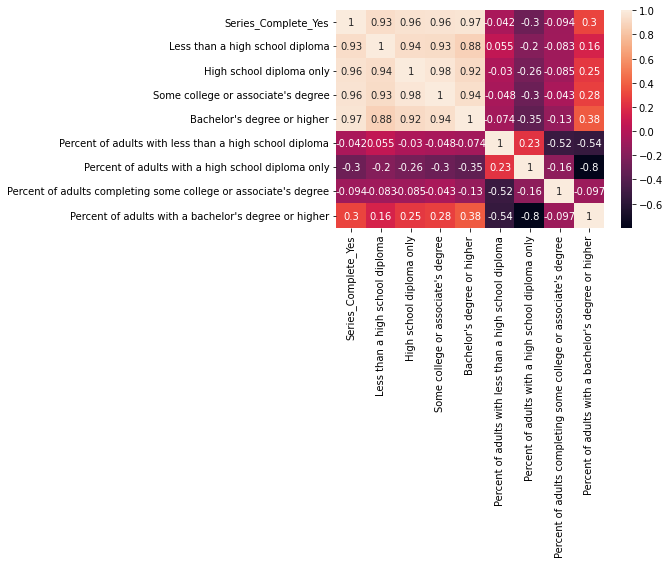

In [ ]:
columns=["Series_Complete_Yes", "Less than a high school diploma","High school diploma only","Some college or associate's degree","Bachelor's degree or higher",
         "Percent of adults with less than a high school diploma","Percent of adults with a high school diploma only", 'Percent of adults completing some college or associate\'s degree', 
         "Percent of adults with a bachelor's degree or higher"]
df_heatmap=fullData[columns].corr(method='pearson')

ax = sns.heatmap(df_heatmap, yticklabels = columns, xticklabels = columns,  annot = True)

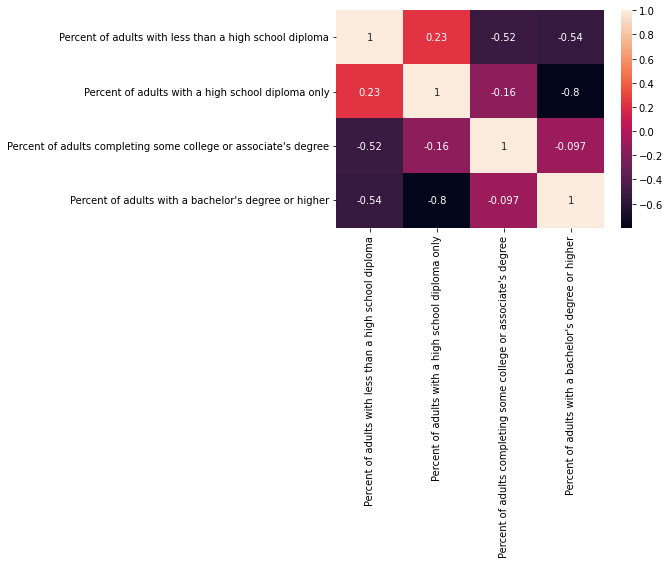

In [ ]:
columns=["Percent of adults with less than a high school diploma","Percent of adults with a high school diploma only", 'Percent of adults completing some college or associate\'s degree', 
         "Percent of adults with a bachelor's degree or higher"]
df_heatmap=fullData[columns].corr(method='pearson')

ax = sns.heatmap(df_heatmap, yticklabels = columns, xticklabels = columns,  annot = True)

In [ ]:
df_heatmap

,Series_Complete_Yes,Less than a high school diploma,High school diploma only,Some college or associate's degree,Bachelor's degree or higher,Percent of adults with less than a high school diploma,Percent of adults with a high school diploma only,Percent of adults completing some college or associate's degree,Percent of adults with a bachelor's degree or higher
Series_Complete_Yes,1.000000,0.934436,0.955797,0.964102,0.969882,-0.041727,-0.298674,-0.094028,0.299853
Less than a high school diploma,0.934436,1.000000,0.935916,0.929368,0.878098,0.054934,-0.199325,-0.082572,0.156297
High school diploma only,0.955797,0.935916,1.000000,0.978393,0.919032,-0.029650,-0.255072,-0.085396,0.254953
Some college or associate's degree,0.964102,0.929368,0.978393,1.000000,0.942496,-0.047809,-0.301244,-0.043281,0.277394
Bachelor's degree or higher,0.969882,0.878098,0.919032,0.942496,1.000000,-0.074216,-0.352297,-0.128585,0.380036
Percent of adults with less than a high school diploma,-0.041727,0.054934,-0.029650,-0.047809,-0.074216,1.000000,0.230342,-0.521258,-0.540949
Percent of adults with a high school diploma only,-0.298674,-0.199325,-0.255072,-0.301244,-0.352297,0.230342,1.000000,-0.158425,-0.798860
Percent of adults completing some college or associate's degree,-0.094028,-0.082572,-0.085396,-0.043281,-0.128585,-0.521258,-0.158425,1.000000,-0.097100
Percent of adults with a bachelor's degree or higher,0.299853,0.156297,0.254953,0.277394,0.380036,-0.540949,-0.798860,-0.097100,1.000000


# Unemployment VS Vaccination Rate:

In [ ]:
%ls

county_population.csv                                  populationData/
COVID-19_Vaccinations_in_the_United_States_County.csv  Unemployment/
educationData/


In [ ]:
%cd ..

/content/drive/My Drive/US_Vaccine_data


In [ ]:
%cd Unemployment/

/content/drive/My Drive/US_Vaccine_data/Unemployment


In [ ]:
%ls

Unemployment.csv


In [ ]:
unemployment_df = pd.read_csv('Unemployment.csv', low_memory = False)

In [ ]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   FIPS_Code                             3275 non-null   int64  
 1   State                                 3275 non-null   object 
 2   Area_name                             3275 non-null   object 
 3   Civilian_labor_force_2020             3193 non-null   object 
 4   Employed_2020                         3193 non-null   object 
 5   Unemployed_2020                       3193 non-null   object 
 6   Unemployment_rate_2020                3193 non-null   float64
 7   Median_Household_Income               3193 non-null   object 
 8   Med_HH_Income_Percent_of_State_Total  3192 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 230.4+ KB


In [ ]:
nanPercent = unemployment_df.isna().sum() / unemployment_df.shape[0] * 100
nanPercent

FIPS_Code                               0.000000
State                                   0.000000
Area_name                               0.000000
Civilian_labor_force_2020               2.503817
Employed_2020                           2.503817
Unemployed_2020                         2.503817
Unemployment_rate_2020                  2.503817
Median_Household_Income                 2.503817
Med_HH_Income_Percent_of_State_Total    2.534351
dtype: float64

In [ ]:
unemployment_df = unemployment_df.rename(columns={"FIPS_Code": "FIPS"})
unemployment_df = unemployment_df.rename(columns={"Civilian_labor_force_2020": "Civilian_labor_force"})
unemployment_df = unemployment_df.rename(columns={"Employed_2020": "Employed"})
unemployment_df = unemployment_df.rename(columns={"Unemployed_2020": "Unemployed"})
unemployment_df = unemployment_df.rename(columns={"Unemployment_rate_2020": "Unemployment_rate"})

In [ ]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   FIPS                                  3275 non-null   int64  
 1   State                                 3275 non-null   object 
 2   Area_name                             3275 non-null   object 
 3   Civilian_labor_force                  3193 non-null   object 
 4   Employed                              3193 non-null   object 
 5   Unemployed                            3193 non-null   object 
 6   Unemployment_rate                     3193 non-null   float64
 7   Median_Household_Income               3193 non-null   object 
 8   Med_HH_Income_Percent_of_State_Total  3192 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 230.4+ KB


In [ ]:
unemployment_df.dropna(subset = ['Employed', 'Unemployed', 'Unemployment_rate', 'Median_Household_Income', 'Med_HH_Income_Percent_of_State_Total'], inplace=True)

In [ ]:
unemployment_df["Civilian_labor_force"]  = unemployment_df["Civilian_labor_force"].apply(lambda x: np.nan if x is np.nan else str(x).replace(",",""))
unemployment_df["Civilian_labor_force"] = unemployment_df["Civilian_labor_force"].astype(int)

unemployment_df["Employed"]  = unemployment_df["Employed"] .apply(lambda x: x.replace(",",""))
unemployment_df["Employed"] = unemployment_df["Employed"].astype(int)

unemployment_df["Unemployed"]  = unemployment_df["Unemployed"] .apply(lambda x: x.replace(",",""))
unemployment_df["Unemployed"] = unemployment_df["Unemployed"].astype(int)

unemployment_df["Median_Household_Income"]  = unemployment_df["Median_Household_Income"] .apply(lambda x: x.replace(",",""))
unemployment_df["Median_Household_Income"] = unemployment_df["Median_Household_Income"].astype(int)

In [ ]:
unemployment_df

,FIPS,State,Area_name,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Med_HH_Income_Percent_of_State_Total
1,1000,AL,Alabama,2230118,2099062,131056,5.9,51771,100.0
2,1001,AL,"Autauga County, AL",25838,24576,1262,4.9,58233,112.5
3,1003,AL,"Baldwin County, AL",96763,91338,5425,5.6,59871,115.6
4,1005,AL,"Barbour County, AL",8587,7982,605,7.0,35972,69.5
5,1007,AL,"Bibb County, AL",8640,8067,573,6.6,47918,92.6
...,...,...,...,...,...,...,...,...,...
3191,56037,WY,"Sweetwater County, WY",20840,19308,1532,7.4,80639,121.9
3192,56039,WY,"Teton County, WY",15204,14292,912,6.0,98837,149.4
3193,56041,WY,"Uinta County, WY",9312,8730,582,6.3,70756,107.0
3194,56043,WY,"Washakie County, WY",4004,3793,211,5.3,55122,83.3


In [ ]:
covid_vaccine_df_unemp = unemployment_df

In [ ]:
covid_vaccine_df_unemp

,FIPS,State,Area_name,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Med_HH_Income_Percent_of_State_Total
1,1000,AL,Alabama,2230118,2099062,131056,5.9,51771,100.0
2,1001,AL,"Autauga County, AL",25838,24576,1262,4.9,58233,112.5
3,1003,AL,"Baldwin County, AL",96763,91338,5425,5.6,59871,115.6
4,1005,AL,"Barbour County, AL",8587,7982,605,7.0,35972,69.5
5,1007,AL,"Bibb County, AL",8640,8067,573,6.6,47918,92.6
...,...,...,...,...,...,...,...,...,...
3191,56037,WY,"Sweetwater County, WY",20840,19308,1532,7.4,80639,121.9
3192,56039,WY,"Teton County, WY",15204,14292,912,6.0,98837,149.4
3193,56041,WY,"Uinta County, WY",9312,8730,582,6.3,70756,107.0
3194,56043,WY,"Washakie County, WY",4004,3793,211,5.3,55122,83.3


In [ ]:
covid_vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733201 entries, 0 to 964169
Data columns (total 33 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Date                                     733201 non-null  datetime64[ns]
 1   FIPS                                     733201 non-null  int64         
 2   MMWR_week                                733201 non-null  int64         
 3   Recip_County                             733201 non-null  object        
 4   Recip_State                              733201 non-null  object        
 5   Series_Complete_Pop_Pct                  733201 non-null  float64       
 6   Series_Complete_Yes                      733201 non-null  int64         
 7   Series_Complete_12Plus                   733201 non-null  float64       
 8   Series_Complete_12PlusPop_Pct            733201 non-null  float64       
 9   Series_Complete_18Plus    

In [ ]:
data1 = covid_vaccine_df[['Recip_County', 'FIPS', 'Series_Complete_Yes', 'Series_Complete_Pop_Pct', 'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct']].groupby(['Recip_County']).mean()

In [ ]:
data1["FIPS"] = data1["FIPS"].astype(int)

In [ ]:
data1

,FIPS,Series_Complete_Yes,Series_Complete_Pop_Pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct
Recip_County,,,,,
Abbeville County,45001,5664.021277,23.090071,6816.343972,27.793617
Acadia Parish,22001,14995.593750,24.168403,18621.274306,30.008333
Accomack County,51001,11974.147059,37.053676,14639.095588,45.300000
Adair County,27323,4284.310409,24.168030,5371.208178,29.979833
Adams County,31987,17762.496906,27.498995,20791.802011,33.166473
...,...,...,...,...,...
York County,39649,73540.853333,29.556167,90553.700833,36.629000
Yuba County,6115,18279.309353,23.235252,24211.658273,30.778058
Yukon-Koyukuk Census Area,2290,2364.382143,45.208214,2747.732143,52.541786


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1755 entries, Abbeville County to Ziebach County
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FIPS                        1755 non-null   int64  
 1   Series_Complete_Yes         1755 non-null   float64
 2   Series_Complete_Pop_Pct     1755 non-null   float64
 3   Administered_Dose1_Recip    1755 non-null   float64
 4   Administered_Dose1_Pop_Pct  1755 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 82.3+ KB


In [ ]:
data1

,FIPS,Series_Complete_Yes,Series_Complete_Pop_Pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct
Recip_County,,,,,
Abbeville County,45001,5664.021277,23.090071,6816.343972,27.793617
Acadia Parish,22001,14995.593750,24.168403,18621.274306,30.008333
Accomack County,51001,11974.147059,37.053676,14639.095588,45.300000
Adair County,27323,4284.310409,24.168030,5371.208178,29.979833
Adams County,31987,17762.496906,27.498995,20791.802011,33.166473
...,...,...,...,...,...
York County,39649,73540.853333,29.556167,90553.700833,36.629000
Yuba County,6115,18279.309353,23.235252,24211.658273,30.778058
Yukon-Koyukuk Census Area,2290,2364.382143,45.208214,2747.732143,52.541786


In [ ]:
fullData = data1.merge(covid_vaccine_df_unemp, left_on=['FIPS'], right_on=['FIPS'])

In [ ]:
fullData

,FIPS,Series_Complete_Yes,Series_Complete_Pop_Pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,State,Area_name,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Med_HH_Income_Percent_of_State_Total
0,45001,5664.021277,23.090071,6816.343972,27.793617,SC,"Abbeville County, SC",10124,9454,670,6.6,46499,82.5
1,22001,14995.593750,24.168403,18621.274306,30.008333,LA,"Acadia Parish, LA",23463,21758,1705,7.3,44728,87.5
2,51001,11974.147059,37.053676,14639.095588,45.300000,VA,"Accomack County, VA",16052,15011,1041,6.5,47335,61.9
3,50001,14271.412811,38.803915,17309.882562,47.067260,VT,"Addison County, VT",19936,18947,989,5.0,73574,116.2
4,45003,41221.860714,24.124643,51698.650000,30.255714,SC,"Aiken County, SC",75531,71743,3788,5.0,56824,100.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,30111,46321.059028,28.717708,54436.843750,33.749653,MT,"Yellowstone County, MT",83203,78676,4527,5.4,61435,107.3
1310,6113,79757.754386,36.173333,99096.887719,44.941754,CA,"Yolo County, CA",105026,97111,7915,7.5,70951,88.2
1311,6115,18279.309353,23.235252,24211.658273,30.778058,CA,"Yuba County, CA",30042,26879,3163,10.5,56607,70.4
1312,2290,2364.382143,45.208214,2747.732143,52.541786,AK,"Yukon-Koyukuk Census Area, AK",2308,2028,280,12.1,42063,54.5


In [ ]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1314 entries, 0 to 1313
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   FIPS                                  1314 non-null   int64  
 1   Series_Complete_Yes                   1314 non-null   float64
 2   Series_Complete_Pop_Pct               1314 non-null   float64
 3   Administered_Dose1_Recip              1314 non-null   float64
 4   Administered_Dose1_Pop_Pct            1314 non-null   float64
 5   State                                 1314 non-null   object 
 6   Area_name                             1314 non-null   object 
 7   Civilian_labor_force                  1314 non-null   int64  
 8   Employed                              1314 non-null   int64  
 9   Unemployed                            1314 non-null   int64  
 10  Unemployment_rate                     1314 non-null   float64
 11  Median_Household_

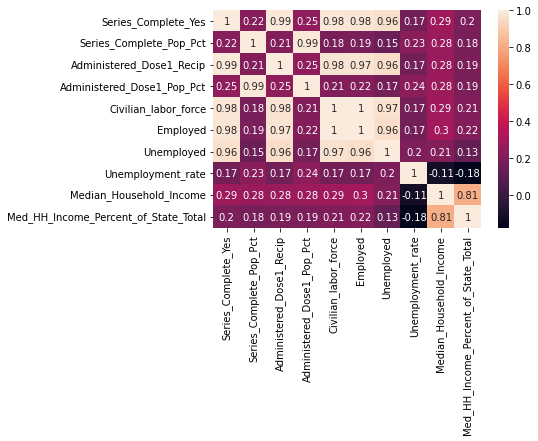

In [ ]:
columns=["Series_Complete_Yes","Series_Complete_Pop_Pct", 'Administered_Dose1_Recip' ,'Administered_Dose1_Pop_Pct' , "Civilian_labor_force","Employed","Unemployed","Unemployment_rate",
         "Median_Household_Income","Med_HH_Income_Percent_of_State_Total"]
df_heatmap=fullData[columns].corr(method='pearson')

ax = sns.heatmap(df_heatmap, yticklabels = columns, xticklabels = columns,  annot = True)

In [ ]:
a = fullData.groupby("Area_name")[["Series_Complete_Yes","Series_Complete_Pop_Pct", 'Administered_Dose1_Recip' ,'Administered_Dose1_Pop_Pct',"Unemployment_rate"]].sum().nsmallest(10, 'Unemployment_rate')
a

,Series_Complete_Yes,Series_Complete_Pop_Pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Unemployment_rate
Area_name,,,,,
"Cimarron County, OK",388.248062,18.167442,454.720930,21.274031,2.0
"Keya Paha County, NE",83.289855,10.334783,113.449275,14.082609,2.0
"Wichita County, KS",670.498127,31.645693,790.022472,37.283521,2.1
"Dundy County, NE",409.042308,24.161154,477.423077,28.194615,2.2
"Gray County, KS",1423.660584,23.777007,1706.667883,28.501825,2.2
"Hayes County, NE",97.700935,10.587850,119.242991,12.932710,2.2
"Wallace County, KS",369.000000,24.305000,422.073077,27.805769,2.2
"Antelope County, NE",251.617647,3.989706,565.500000,8.977941,2.3
"Baca County, CO",598.584211,16.717368,678.457895,18.948947,2.3


In [ ]:
a = fullData.groupby("Area_name")[["Series_Complete_Yes","Series_Complete_Pop_Pct", 'Administered_Dose1_Recip' ,'Administered_Dose1_Pop_Pct', "Unemployment_rate"]].sum().nlargest(10, 'Unemployment_rate')
a

,Series_Complete_Yes,Series_Complete_Pop_Pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Unemployment_rate
Area_name,,,,,
"Imperial County, CA",65317.985663,36.045878,86968.268817,47.992115,22.5
"Skagway Municipality, AK",636.878788,53.841667,724.621212,61.259470,21.5
"Atlantic County, NJ",92418.951220,35.046690,114848.989547,43.556794,17.8
"Venango County, PA",12666.555536,37.696219,16106.362588,46.816630,17.8
"Magoffin County, KY",3333.183521,27.411985,4085.921348,33.599625,16.1
"Bronx County, NY",435916.641844,30.735816,536871.134752,37.853191,16.0
"Colusa County, CA",6597.413127,30.617375,8447.046332,39.202703,16.0
"Luna County, NM",1837.111111,7.753333,2590.155556,10.917778,15.9
"Denali Borough, AK",680.366038,32.440755,806.932075,38.479623,15.7


In [ ]:
df_heatmap

,Series_Complete_Yes,Less than a high school diploma,High school diploma only,Some college or associate's degree,Bachelor's degree or higher,Percent of adults with less than a high school diploma,Percent of adults with a high school diploma only,Percent of adults completing some college or associate's degree,Percent of adults with a bachelor's degree or higher
Series_Complete_Yes,1.000000,0.934436,0.955797,0.964102,0.969882,-0.041727,-0.298674,-0.094028,0.299853
Less than a high school diploma,0.934436,1.000000,0.935916,0.929368,0.878098,0.054934,-0.199325,-0.082572,0.156297
High school diploma only,0.955797,0.935916,1.000000,0.978393,0.919032,-0.029650,-0.255072,-0.085396,0.254953
Some college or associate's degree,0.964102,0.929368,0.978393,1.000000,0.942496,-0.047809,-0.301244,-0.043281,0.277394
Bachelor's degree or higher,0.969882,0.878098,0.919032,0.942496,1.000000,-0.074216,-0.352297,-0.128585,0.380036
Percent of adults with less than a high school diploma,-0.041727,0.054934,-0.029650,-0.047809,-0.074216,1.000000,0.230342,-0.521258,-0.540949
Percent of adults with a high school diploma only,-0.298674,-0.199325,-0.255072,-0.301244,-0.352297,0.230342,1.000000,-0.158425,-0.798860
Percent of adults completing some college or associate's degree,-0.094028,-0.082572,-0.085396,-0.043281,-0.128585,-0.521258,-0.158425,1.000000,-0.097100
Percent of adults with a bachelor's degree or higher,0.299853,0.156297,0.254953,0.277394,0.380036,-0.540949,-0.798860,-0.097100,1.000000


# Population VS Vaccination Rate:

In [ ]:
%ls

county_population.csv                                  populationData/
COVID-19_Vaccinations_in_the_United_States_County.csv  Population_new/
educationData/                                         Unemployment/


In [ ]:
%cd ..

/content/drive/My Drive/US_Vaccine_data


In [ ]:
%cd Population_new/

/content/drive/My Drive/US_Vaccine_data/Population_new


In [ ]:
%ls

PopulationEstimates.csv


In [ ]:
population_df = pd.read_csv('PopulationEstimates.csv', low_memory = False)

In [ ]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FIPStxt          3280 non-null   int64 
 1   State            3280 non-null   object
 2   Area name        3280 non-null   object
 3   Population 2020  3274 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.6+ KB


In [ ]:
population_df = population_df.rename(columns={"FIPStxt": "FIPS"})
population_df = population_df.rename(columns={"Population 2020": "Population"})

In [ ]:
population_df

,FIPS,State,Area name,Population
0,0,US,United States,"33,14,49,281"
1,1000,AL,Alabama,"50,24,279"
2,1001,AL,Autauga County,"58,805"
3,1003,AL,Baldwin County,"2,31,767"
4,1005,AL,Barbour County,"25,223"
...,...,...,...,...
3275,72145,PR,Vega Baja Municipio,"54,414"
3276,72147,PR,Vieques Municipio,"8,249"
3277,72149,PR,Villalba Municipio,"22,093"
3278,72151,PR,Yabucoa Municipio,"30,426"


In [ ]:
nanPercent = population_df.isna().sum() / population_df.shape[0] * 100
nanPercent

FIPS          0.000000
State         0.000000
Area name     0.000000
Population    0.182927
dtype: float64

In [ ]:
population_df.dropna(subset = ['Population'], inplace=True)

In [ ]:
nanPercent = population_df.isna().sum() / population_df.shape[0] * 100
nanPercent

FIPS          0.0
State         0.0
Area name     0.0
Population    0.0
dtype: float64

In [ ]:
population_df["Population"]  = population_df["Population"].apply(lambda x: np.nan if x is np.nan else str(x).replace(",",""))
population_df["Population"] = population_df["Population"].astype(int)

In [ ]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3274 entries, 0 to 3279
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FIPS        3274 non-null   int64 
 1   State       3274 non-null   object
 2   Area name   3274 non-null   object
 3   Population  3274 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 127.9+ KB


In [ ]:
population_df

,FIPS,State,Area name,Population
0,0,US,United States,331449281
1,1000,AL,Alabama,5024279
2,1001,AL,Autauga County,58805
3,1003,AL,Baldwin County,231767
4,1005,AL,Barbour County,25223
...,...,...,...,...
3275,72145,PR,Vega Baja Municipio,54414
3276,72147,PR,Vieques Municipio,8249
3277,72149,PR,Villalba Municipio,22093
3278,72151,PR,Yabucoa Municipio,30426


In [ ]:
covid_vaccine_df_pop = population_df

In [ ]:
covid_vaccine_df_pop

,FIPS,State,Area name,Population
0,0,US,United States,331449281
1,1000,AL,Alabama,5024279
2,1001,AL,Autauga County,58805
3,1003,AL,Baldwin County,231767
4,1005,AL,Barbour County,25223
...,...,...,...,...
3275,72145,PR,Vega Baja Municipio,54414
3276,72147,PR,Vieques Municipio,8249
3277,72149,PR,Villalba Municipio,22093
3278,72151,PR,Yabucoa Municipio,30426


In [ ]:
covid_vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733201 entries, 0 to 964169
Data columns (total 33 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Date                                     733201 non-null  datetime64[ns]
 1   FIPS                                     733201 non-null  int64         
 2   MMWR_week                                733201 non-null  int64         
 3   Recip_County                             733201 non-null  object        
 4   Recip_State                              733201 non-null  object        
 5   Series_Complete_Pop_Pct                  733201 non-null  float64       
 6   Series_Complete_Yes                      733201 non-null  int64         
 7   Series_Complete_12Plus                   733201 non-null  float64       
 8   Series_Complete_12PlusPop_Pct            733201 non-null  float64       
 9   Series_Complete_18Plus    

In [ ]:
covid_vaccine_df["FIPS"] = covid_vaccine_df["FIPS"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data1 = covid_vaccine_df[['Recip_County', 'FIPS', 'Series_Complete_Yes', 'Administered_Dose1_Recip']].groupby(['Recip_County', 'FIPS']).mean()

In [ ]:
data1

Series_Complete_Yes  Administered_Dose1_Recip
Recip_County              FIPS                                                
Abbeville County          45001          5664.021277               6816.343972
Acadia Parish             22001         14995.593750              18621.274306
Accomack County           51001         11974.147059              14639.095588
Adair County              19001          2188.245283               2599.347170
                          21001          4143.138577               4989.850187
...                                              ...                       ...
Yuba County               6115          18279.309353              24211.658273
Yukon-Koyukuk Census Area 2290           2364.382143               2747.732143
Yuma County               4027          72794.242647              91651.985294
                          8125           1943.634259               2370.189815
Ziebach County            46137           394.037975                475.215190

[2898 rows x 2 columns]

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2898 entries, ('Abbeville County', 45001) to ('Ziebach County', 46137)
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Series_Complete_Yes       2898 non-null   float64
 1   Administered_Dose1_Recip  2898 non-null   float64
dtypes: float64(2)
memory usage: 93.1+ KB


In [ ]:
data1

Series_Complete_Yes  Administered_Dose1_Recip
Recip_County              FIPS                                                
Abbeville County          45001          5664.021277               6816.343972
Acadia Parish             22001         14995.593750              18621.274306
Accomack County           51001         11974.147059              14639.095588
Adair County              19001          2188.245283               2599.347170
                          21001          4143.138577               4989.850187
...                                              ...                       ...
Yuba County               6115          18279.309353              24211.658273
Yukon-Koyukuk Census Area 2290           2364.382143               2747.732143
Yuma County               4027          72794.242647              91651.985294
                          8125           1943.634259               2370.189815
Ziebach County            46137           394.037975                475.215190

[2898 rows x 2 columns]

In [ ]:
fullData = data1.merge(covid_vaccine_df_pop, left_on=['FIPS'], right_on=['FIPS'])

In [ ]:
fullData

,FIPS,Series_Complete_Yes,Administered_Dose1_Recip,State,Area name,Population
0,45001,5664.021277,6816.343972,SC,Abbeville County,24295
1,22001,14995.593750,18621.274306,LA,Acadia Parish,57576
2,51001,11974.147059,14639.095588,VA,Accomack County,33413
3,19001,2188.245283,2599.347170,IA,Adair County,7496
4,21001,4143.138577,4989.850187,KY,Adair County,18903
...,...,...,...,...,...,...
2893,6115,18279.309353,24211.658273,CA,Yuba County,81575
2894,2290,2364.382143,2747.732143,AK,Yukon-Koyukuk Census Area,5343
2895,4027,72794.242647,91651.985294,AZ,Yuma County,203881
2896,8125,1943.634259,2370.189815,CO,Yuma County,9988


In [ ]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2898 entries, 0 to 2897
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FIPS                      2898 non-null   int64  
 1   Series_Complete_Yes       2898 non-null   float64
 2   Administered_Dose1_Recip  2898 non-null   float64
 3   State                     2898 non-null   object 
 4   Area name                 2898 non-null   object 
 5   Population                2898 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 158.5+ KB


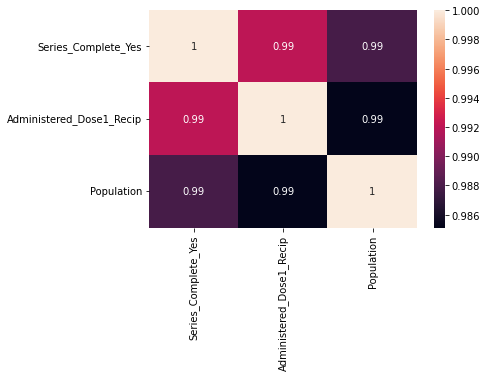

In [ ]:
columns=["Series_Complete_Yes", 'Administered_Dose1_Recip' , 'Population']
df_heatmap=fullData[columns].corr(method='pearson')

ax = sns.heatmap(df_heatmap, yticklabels = columns, xticklabels = columns,  annot = True)

In [ ]:
a = fullData.groupby("Area name")[["Series_Complete_Yes","Series_Complete_Pop_Pct", 'Administered_Dose1_Recip' ,'Administered_Dose1_Pop_Pct',"Population"]].sum().nsmallest(10, 'Population')
a

,Series_Complete_Yes,Series_Complete_Pop_Pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Population
Area name,,,,,
Arthur County,16.666667,3.600000,22.000000,4.766667,434
Petroleum County,118.371179,24.315284,126.305677,25.935808,496
Loup County,80.241379,12.093103,99.655172,15.008621,607
Yakutat City and Borough,332.779923,57.478764,363.270270,62.744788,662
Banner County,43.600000,5.854286,73.914286,9.917143,674
Slope County,58.658436,7.826749,76.534979,10.205761,706
Hooker County,93.578947,13.730526,131.621053,19.296842,711
Esmeralda County,229.188525,26.252049,292.459016,33.495902,729
Keya Paha County,83.289855,10.334783,113.449275,14.082609,769


In [ ]:
a = fullData.groupby("Area name")[["Series_Complete_Yes","Series_Complete_Pop_Pct", 'Administered_Dose1_Recip' ,'Administered_Dose1_Pop_Pct',"Population"]].sum().nlargest(10, 'Population')
a

,Series_Complete_Yes,Series_Complete_Pop_Pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Population
Area name,,,,,
Los Angeles County,3.555834e+06,35.418246,4.450576e+06,44.334035,10014009
Maricopa County,1.303857e+06,29.071479,1.629256e+06,36.323592,4420568
San Diego County,9.665189e+05,28.951943,2.133958e+06,63.862898,3298634
Miami-Dade County,1.070327e+06,39.396516,1.379554e+06,50.777003,2701767
Riverside County,6.994738e+05,28.312014,8.876870e+05,35.930742,2418185
Queens County,8.969744e+05,39.796454,1.103120e+06,48.941844,2405464
King County,9.686836e+05,42.999296,1.153607e+06,51.209859,2269675
San Bernardino County,5.847283e+05,26.817895,7.377846e+05,33.839649,2181654
Broward County,6.702583e+05,34.325694,8.679135e+05,44.445486,1944375


In [ ]:
max(fullData["Series_Complete_Yes"].unique())

3555833.950877193

In [ ]:
max(fullData["Series_Complete_Pop_Pct"].unique())

84.47902621722838

# Rough

In [ ]:
fullData = education_df.merge(covid_vaccine_df_edu, left_on=['FIPS'], right_on=['FIPS'])

In [ ]:
fullData

,FIPS,State,Area name,Less than a high school diploma,High school diploma only,Some college or associate's degree,Bachelor's degree or higher,Percent of adults with less than a high school diploma,Percent of adults with a high school diploma only,Percent of adults completing some college or associate's degree,Percent of adults with a bachelor's degree or higher,Date,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,YearMonth
0,1001,AL,Autauga County,"4,291","12,551","10,596","9,929",11.5,33.6,28.4,26.6,2021-10-20,42,Autauga County,AL,35.0,19578,19577.0,41.2,18410,42.9,5572,62.4,92.5,24449.0,43.8,24447.0,51.4,22927.0,53.4,6708.0,75.2,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0,2021-10
1,1001,AL,Autauga County,"4,291","12,551","10,596","9,929",11.5,33.6,28.4,26.6,2021-10-19,42,Autauga County,AL,35.0,19562,19561.0,41.1,18397,42.9,5572,62.4,92.5,24428.0,43.7,24426.0,51.3,22908.0,53.4,6704.0,75.1,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0,2021-10
2,1001,AL,Autauga County,"4,291","12,551","10,596","9,929",11.5,33.6,28.4,26.6,2021-10-18,42,Autauga County,AL,35.0,19550,19549.0,41.1,18388,42.9,5572,62.4,92.5,24408.0,43.7,24406.0,51.3,22889.0,53.3,6702.0,75.1,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0,2021-10
3,1001,AL,Autauga County,"4,291","12,551","10,596","9,929",11.5,33.6,28.4,26.6,2021-10-17,42,Autauga County,AL,35.0,19539,19538.0,41.1,18378,42.8,5572,62.4,92.5,24388.0,43.7,24386.0,51.3,22870.0,53.3,6698.0,75.1,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0,2021-10
4,1001,AL,Autauga County,"4,291","12,551","10,596","9,929",11.5,33.6,28.4,26.6,2021-10-16,41,Autauga County,AL,34.9,19486,19485.0,41.0,18331,42.7,5562,62.3,92.5,24352.0,43.6,24350.0,51.2,22837.0,53.2,6690.0,75.0,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0,2021-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733196,72153,PR,Yauco Municipio,"6,794","8,512","3,973","6,304",26.6,33.3,15.5,24.6,2021-02-01,5,Yauco Municipio,PR,1.8,588,588.0,2.0,588,2.1,27,0.5,97.0,2048.0,6.1,2046.0,6.8,2045.0,7.4,384.0,6.7,C,9.0,9.0,9.0,9.0,Metro,1.0,1.0,1.0,1.0,2021-02
733197,72153,PR,Yauco Municipio,"6,794","8,512","3,973","6,304",26.6,33.3,15.5,24.6,2021-01-31,5,Yauco Municipio,PR,1.8,588,588.0,2.0,588,2.1,27,0.5,97.0,2048.0,6.1,2046.0,6.8,2045.0,7.4,384.0,6.7,C,9.0,9.0,9.0,9.0,Metro,1.0,1.0,1.0,1.0,2021-01
733198,72153,PR,Yauco Municipio,"6,794","8,512","3,973","6,304",26.6,33.3,15.5,24.6,2021-01-30,4,Yauco Municipio,PR,1.7,557,557.0,1.9,557,2.0,23,0.4,97.0,1825.0,5.4,1823.0,6.1,1822.0,6.6,301.0,5.3,C,9.0,9.0,9.0,9.0,Metro,1.0,1.0,1.0,1.0,2021-01
733199,72153,PR,Yauco Municipio,"6,794","8,512","3,973","6,304",26.6,33.3,15.5,24.6,2021-01-29,4,Yauco Municipio,PR,1.5,516,516.0,1.7,516,1.9,20,0.4,97.1,1724.0,5.1,1722.0,5.8,1721.0,6.2,262.0,4.6,C,9.0,9.0,9.0,9.0,Metro,1.0,1.0,1.0,1.0,2021-01


In [ ]:
# helloWorld.replace("o","")
# fullData["Bachelor's degree or higher"] = fullData["Bachelor's degree or higher"].astype(int)
fullData["Bachelor's degree or higher"]  = fullData["Bachelor's degree or higher"] .apply(lambda x: x.replace(",",""))

In [ ]:
fullData["Bachelor's degree or higher"] = fullData["Bachelor's degree or higher"].astype(int)

In [ ]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733201 entries, 0 to 733200
Data columns (total 43 columns):
 #   Column                                                           Non-Null Count   Dtype         
---  ------                                                           --------------   -----         
 0   FIPS                                                             733201 non-null  int64         
 1   State                                                            733201 non-null  object        
 2   Area name                                                        733201 non-null  object        
 3   Less than a high school diploma                                  733201 non-null  object        
 4   High school diploma only                                         733201 non-null  object        
 5   Some college or associate's degree                               733201 non-null  object        
 6   Bachelor's degree or higher                                      733

In [ ]:
fullData

,FIPS,State,Area name,Less than a high school diploma,High school diploma only,Some college or associate's degree,Bachelor's degree or higher,Percent of adults with less than a high school diploma,Percent of adults with a high school diploma only,Percent of adults completing some college or associate's degree,Percent of adults with a bachelor's degree or higher,Date,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,YearMonth
0,1001,AL,Autauga County,"4,291","12,551","10,596",9929,11.5,33.6,28.4,26.6,2021-10-20,42,Autauga County,AL,35.0,19578,19577.0,41.2,18410,42.9,5572,62.4,92.5,24449.0,43.8,24447.0,51.4,22927.0,53.4,6708.0,75.2,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0,2021-10
1,1001,AL,Autauga County,"4,291","12,551","10,596",9929,11.5,33.6,28.4,26.6,2021-10-19,42,Autauga County,AL,35.0,19562,19561.0,41.1,18397,42.9,5572,62.4,92.5,24428.0,43.7,24426.0,51.3,22908.0,53.4,6704.0,75.1,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0,2021-10
2,1001,AL,Autauga County,"4,291","12,551","10,596",9929,11.5,33.6,28.4,26.6,2021-10-18,42,Autauga County,AL,35.0,19550,19549.0,41.1,18388,42.9,5572,62.4,92.5,24408.0,43.7,24406.0,51.3,22889.0,53.3,6702.0,75.1,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0,2021-10
3,1001,AL,Autauga County,"4,291","12,551","10,596",9929,11.5,33.6,28.4,26.6,2021-10-17,42,Autauga County,AL,35.0,19539,19538.0,41.1,18378,42.8,5572,62.4,92.5,24388.0,43.7,24386.0,51.3,22870.0,53.3,6698.0,75.1,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0,2021-10
4,1001,AL,Autauga County,"4,291","12,551","10,596",9929,11.5,33.6,28.4,26.6,2021-10-16,41,Autauga County,AL,34.9,19486,19485.0,41.0,18331,42.7,5562,62.3,92.5,24352.0,43.6,24350.0,51.2,22837.0,53.2,6690.0,75.0,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0,2021-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733196,72153,PR,Yauco Municipio,"6,794","8,512","3,973",6304,26.6,33.3,15.5,24.6,2021-02-01,5,Yauco Municipio,PR,1.8,588,588.0,2.0,588,2.1,27,0.5,97.0,2048.0,6.1,2046.0,6.8,2045.0,7.4,384.0,6.7,C,9.0,9.0,9.0,9.0,Metro,1.0,1.0,1.0,1.0,2021-02
733197,72153,PR,Yauco Municipio,"6,794","8,512","3,973",6304,26.6,33.3,15.5,24.6,2021-01-31,5,Yauco Municipio,PR,1.8,588,588.0,2.0,588,2.1,27,0.5,97.0,2048.0,6.1,2046.0,6.8,2045.0,7.4,384.0,6.7,C,9.0,9.0,9.0,9.0,Metro,1.0,1.0,1.0,1.0,2021-01
733198,72153,PR,Yauco Municipio,"6,794","8,512","3,973",6304,26.6,33.3,15.5,24.6,2021-01-30,4,Yauco Municipio,PR,1.7,557,557.0,1.9,557,2.0,23,0.4,97.0,1825.0,5.4,1823.0,6.1,1822.0,6.6,301.0,5.3,C,9.0,9.0,9.0,9.0,Metro,1.0,1.0,1.0,1.0,2021-01
733199,72153,PR,Yauco Municipio,"6,794","8,512","3,973",6304,26.6,33.3,15.5,24.6,2021-01-29,4,Yauco Municipio,PR,1.5,516,516.0,1.7,516,1.9,20,0.4,97.1,1724.0,5.1,1722.0,5.8,1721.0,6.2,262.0,4.6,C,9.0,9.0,9.0,9.0,Metro,1.0,1.0,1.0,1.0,2021-01


In [ ]:
temp1 = fullData[['Recip_County', 'FIPS', 'Bachelor\'s degree or higher', 'Series_Complete_Yes']].groupby(['Recip_County', 'FIPS']).sum().nsmallest(10)

TypeError: ignored

In [ ]:
fullData.groupby("Recip_County").agg({'Bachelor\'s degree or higher':'mean'}).sort_values(by='Bachelor\'s degree or higher')

,Bachelor's degree or higher
Recip_County,
Issaquena County,35.0
Daggett County,54.0
Arthur County,75.0
Taliaferro County,100.0
Yakutat City and Borough,100.0
...,...
New York County,766048.0
King County,822615.0
San Diego County,871782.0


In [ ]:
fullData.groupby()['Bachelor\'s degree or higher', 'Series_Complete_Yes'].sum().nsmallest(10)
smallest_state

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


TypeError: ignored

In [ ]:
temp1

Bachelor's degree or higher  Series_Complete_Yes
Recip_County              FIPS                                                   
Abbeville County          45001                       2667.0          5664.021277
Acadia Parish             22001                       5478.0         14995.593750
Accomack County           51001                       4576.0         11974.147059
Adair County              19001                        945.0          2188.245283
                          21001                       2069.0          4143.138577
...                                                      ...                  ...
Yuba County               6115                        8193.0         18279.309353
Yukon-Koyukuk Census Area 2290                         468.0          2364.382143
Yuma County               4027                       19912.0         72794.242647
                          8125                        1446.0          1943.634259
Ziebach County            46137                        270.0           394.037975

[2898 rows x 2 columns]

# Rough

In [ ]:
fullData.loc[fullData['Recip_County'] == 'Autauga County']

,FIPS,State,Area name,Less than a high school diploma,High school diploma only,Some college or associate's degree,Bachelor's degree or higher,Percent of adults with less than a high school diploma,Percent of adults with a high school diploma only,Percent of adults completing some college or associate's degree,Percent of adults with a bachelor's degree or higher,Date,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,1001,AL,Autauga County,"4,291","12,551","10,596",9929,11.5,33.6,28.4,26.6,2021-10-20,42,Autauga County,AL,35.0,19578,19577.0,41.2,18410,42.9,5572,62.4,92.5,24449.0,43.8,24447.0,51.4,22927.0,53.4,6708.0,75.2,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0
1,1001,AL,Autauga County,"4,291","12,551","10,596",9929,11.5,33.6,28.4,26.6,2021-10-19,42,Autauga County,AL,35.0,19562,19561.0,41.1,18397,42.9,5572,62.4,92.5,24428.0,43.7,24426.0,51.3,22908.0,53.4,6704.0,75.1,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0
2,1001,AL,Autauga County,"4,291","12,551","10,596",9929,11.5,33.6,28.4,26.6,2021-10-18,42,Autauga County,AL,35.0,19550,19549.0,41.1,18388,42.9,5572,62.4,92.5,24408.0,43.7,24406.0,51.3,22889.0,53.3,6702.0,75.1,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0
3,1001,AL,Autauga County,"4,291","12,551","10,596",9929,11.5,33.6,28.4,26.6,2021-10-17,42,Autauga County,AL,35.0,19539,19538.0,41.1,18378,42.8,5572,62.4,92.5,24388.0,43.7,24386.0,51.3,22870.0,53.3,6698.0,75.1,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0
4,1001,AL,Autauga County,"4,291","12,551","10,596",9929,11.5,33.6,28.4,26.6,2021-10-16,41,Autauga County,AL,34.9,19486,19485.0,41.0,18331,42.7,5562,62.3,92.5,24352.0,43.6,24350.0,51.2,22837.0,53.2,6690.0,75.0,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1001,AL,Autauga County,"4,291","12,551","10,596",9929,11.5,33.6,28.4,26.6,2021-01-19,3,Autauga County,AL,0.2,127,127.0,0.3,127,0.3,12,0.1,93.9,816.0,1.5,816.0,1.7,816.0,1.9,198.0,2.2,B,5.0,5.0,5.0,5.0,Metro,1.0,1.0,1.0,1.0
275,1001,AL,Autauga County,"4,291","12,551","10,596",9929,11.5,33.6,28.4,26.6,2021-01-18,3,Autauga County,AL,0.2,127,127.0,0.3,127,0.3,12,0.1,93.9,816.0,1.5,816.0,1.7,816.0,1.9,198.0,2.2,B,5.0,5.0,5.0,5.0,Metro,1.0,1.0,1.0,1.0
276,1001,AL,Autauga County,"4,291","12,551","10,596",9929,11.5,33.6,28.4,26.6,2021-01-17,3,Autauga County,AL,0.2,127,127.0,0.3,127,0.3,12,0.1,94.0,742.0,1.3,742.0,1.6,742.0,1.7,135.0,1.5,B,5.0,5.0,5.0,5.0,Metro,1.0,1.0,1.0,1.0
277,1001,AL,Autauga County,"4,291","12,551","10,596",9929,11.5,33.6,28.4,26.6,2021-01-16,2,Autauga County,AL,0.2,121,121.0,0.3,121,0.3,12,0.1,94.1,697.0,1.2,697.0,1.5,697.0,1.6,112.0,1.3,B,5.0,5.0,5.0,5.0,Metro,1.0,1.0,1.0,1.0


In [ ]:
a = fullData[['Recip_County', 'FIPS', 'Bachelor\'s degree or higher', 'Series_Complete_Yes']].groupby(['Recip_County', 'FIPS']).mean()

In [ ]:
a

Bachelor's degree or higher  Series_Complete_Yes
Recip_County              FIPS                                                   
Abbeville County          45001                       2667.0          5664.021277
Acadia Parish             22001                       5478.0         14995.593750
Accomack County           51001                       4576.0         11974.147059
Adair County              19001                        945.0          2188.245283
                          21001                       2069.0          4143.138577
...                                                      ...                  ...
Yuba County               6115                        8193.0         18279.309353
Yukon-Koyukuk Census Area 2290                         468.0          2364.382143
Yuma County               4027                       19912.0         72794.242647
                          8125                        1446.0          1943.634259
Ziebach County            46137                        270.0           394.037975

[2898 rows x 2 columns]

In [ ]:
covid_vaccine_df_edu

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,2021-10-20,28161,42,Yalobusha County,MS,59.1,7154,7153.0,68.9,6850,72.6,2501,98.3,98.3,8034.0,66.4,8033.0,77.4,7657.0,81.1,2661.0,99.9,C,12.0,12.0,12.0,12.0,Non-metro,8.0,8.0,8.0,8.0
1,2021-10-20,13229,42,Pierce County,GA,24.4,4748,4748.0,29.0,4587,31.2,1742,51.3,57.6,5518.0,28.3,5518.0,33.7,5312.0,36.1,1916.0,56.4,C,9.0,9.0,10.0,11.0,Non-metro,5.0,5.0,6.0,7.0
2,2021-10-20,27169,42,Winona County,MN,53.2,26839,26776.0,59.9,25094,60.4,7943,89.3,94.0,29743.0,58.9,29663.0,66.4,27899.0,67.2,8820.0,99.1,A,4.0,4.0,4.0,4.0,Non-metro,8.0,8.0,8.0,8.0
3,2021-10-20,19083,42,Hardin County,IA,50.5,8510,8510.0,57.6,8196,60.5,3258,85.7,97.5,8937.0,53.1,8937.0,60.5,8555.0,63.1,3297.0,86.7,A,4.0,4.0,4.0,4.0,Non-metro,8.0,8.0,8.0,8.0
4,2021-10-20,55027,42,Dodge County,WI,46.3,40685,40685.0,52.7,38675,54.7,13395,83.7,97.0,43365.0,49.4,43364.0,56.2,41046.0,58.1,13825.0,86.4,A,3.0,4.0,4.0,4.0,Non-metro,7.0,8.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023983,2020-12-13,36107,51,Tioga County,NY,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1023984,2020-12-13,38055,51,McLean County,ND,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
1023985,2020-12-13,51550,51,Chesapeake city,VA,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1023986,2020-12-13,25015,51,Hampshire County,MA,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN


In [ ]:
covid_vaccine_df_edu['YearMonth'] = covid_vaccine_df_edu['Date'].dt.strftime('%Y-%m')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
covid_vaccine_df_edu

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,YearMonth
0,2021-10-20,28161,42,Yalobusha County,MS,59.1,7154,7153.0,68.9,6850,72.6,2501,98.3,98.3,8034.0,66.4,8033.0,77.4,7657.0,81.1,2661.0,99.9,C,12.0,12.0,12.0,12.0,Non-metro,8.0,8.0,8.0,8.0,2021-10
1,2021-10-20,13229,42,Pierce County,GA,24.4,4748,4748.0,29.0,4587,31.2,1742,51.3,57.6,5518.0,28.3,5518.0,33.7,5312.0,36.1,1916.0,56.4,C,9.0,9.0,10.0,11.0,Non-metro,5.0,5.0,6.0,7.0,2021-10
2,2021-10-20,27169,42,Winona County,MN,53.2,26839,26776.0,59.9,25094,60.4,7943,89.3,94.0,29743.0,58.9,29663.0,66.4,27899.0,67.2,8820.0,99.1,A,4.0,4.0,4.0,4.0,Non-metro,8.0,8.0,8.0,8.0,2021-10
3,2021-10-20,19083,42,Hardin County,IA,50.5,8510,8510.0,57.6,8196,60.5,3258,85.7,97.5,8937.0,53.1,8937.0,60.5,8555.0,63.1,3297.0,86.7,A,4.0,4.0,4.0,4.0,Non-metro,8.0,8.0,8.0,8.0,2021-10
4,2021-10-20,55027,42,Dodge County,WI,46.3,40685,40685.0,52.7,38675,54.7,13395,83.7,97.0,43365.0,49.4,43364.0,56.2,41046.0,58.1,13825.0,86.4,A,3.0,4.0,4.0,4.0,Non-metro,7.0,8.0,8.0,8.0,2021-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957004,2021-01-02,21137,53,Lincoln County,KY,0.1,13,13.0,0.1,13,0.1,10,0.2,59.8,358.0,1.5,358.0,1.7,358.0,1.9,41.0,0.9,C,9.0,9.0,9.0,9.0,Non-metro,5.0,5.0,5.0,5.0,2021-01
960860,2021-01-01,12031,53,Duval County,FL,0.1,608,608.0,0.1,608,0.1,75,0.1,99.0,14387.0,1.5,14363.0,1.8,14361.0,1.9,2044.0,1.5,C,9.0,9.0,9.0,9.0,Metro,1.0,1.0,1.0,1.0,2021-01
961495,2021-01-01,21137,53,Lincoln County,KY,0.1,13,13.0,0.1,13,0.1,10,0.2,59.8,340.0,1.4,340.0,1.6,340.0,1.8,31.0,0.7,C,9.0,9.0,9.0,9.0,Non-metro,5.0,5.0,5.0,5.0,2021-01
963148,2020-12-31,21137,53,Lincoln County,KY,0.1,13,13.0,0.1,13,0.1,10,0.2,61.7,325.0,1.3,325.0,1.6,325.0,1.7,31.0,0.7,C,9.0,9.0,9.0,9.0,Non-metro,5.0,5.0,5.0,5.0,2020-12


In [ ]:
education_df.shape, covid_vaccine_df_edu.shape

((3283, 11), (733201, 33))

In [ ]:
temp1 = education_df.merge(covid_vaccine_df_edu, left_on=['FIPS'], right_on=['FIPS'])

In [ ]:
temp1

,FIPS,State,Area name,Less than a high school diploma,High school diploma only,Some college or associate's degree,Bachelor's degree or higher,Percent of adults with less than a high school diploma,Percent of adults with a high school diploma only,Percent of adults completing some college or associate's degree,Percent of adults with a bachelor's degree or higher,Date,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,YearMonth
0,1001,AL,Autauga County,"4,291","12,551","10,596","9,929",11.5,33.6,28.4,26.6,2021-10-20,42,Autauga County,AL,35.0,19578,19577.0,41.2,18410,42.9,5572,62.4,92.5,24449.0,43.8,24447.0,51.4,22927.0,53.4,6708.0,75.2,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0,2021-10
1,1001,AL,Autauga County,"4,291","12,551","10,596","9,929",11.5,33.6,28.4,26.6,2021-10-19,42,Autauga County,AL,35.0,19562,19561.0,41.1,18397,42.9,5572,62.4,92.5,24428.0,43.7,24426.0,51.3,22908.0,53.4,6704.0,75.1,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0,2021-10
2,1001,AL,Autauga County,"4,291","12,551","10,596","9,929",11.5,33.6,28.4,26.6,2021-10-18,42,Autauga County,AL,35.0,19550,19549.0,41.1,18388,42.9,5572,62.4,92.5,24408.0,43.7,24406.0,51.3,22889.0,53.3,6702.0,75.1,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0,2021-10
3,1001,AL,Autauga County,"4,291","12,551","10,596","9,929",11.5,33.6,28.4,26.6,2021-10-17,42,Autauga County,AL,35.0,19539,19538.0,41.1,18378,42.8,5572,62.4,92.5,24388.0,43.7,24386.0,51.3,22870.0,53.3,6698.0,75.1,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0,2021-10
4,1001,AL,Autauga County,"4,291","12,551","10,596","9,929",11.5,33.6,28.4,26.6,2021-10-16,41,Autauga County,AL,34.9,19486,19485.0,41.0,18331,42.7,5562,62.3,92.5,24352.0,43.6,24350.0,51.2,22837.0,53.2,6690.0,75.0,B,6.0,7.0,7.0,7.0,Metro,2.0,3.0,3.0,3.0,2021-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733196,72153,PR,Yauco Municipio,"6,794","8,512","3,973","6,304",26.6,33.3,15.5,24.6,2021-02-01,5,Yauco Municipio,PR,1.8,588,588.0,2.0,588,2.1,27,0.5,97.0,2048.0,6.1,2046.0,6.8,2045.0,7.4,384.0,6.7,C,9.0,9.0,9.0,9.0,Metro,1.0,1.0,1.0,1.0,2021-02
733197,72153,PR,Yauco Municipio,"6,794","8,512","3,973","6,304",26.6,33.3,15.5,24.6,2021-01-31,5,Yauco Municipio,PR,1.8,588,588.0,2.0,588,2.1,27,0.5,97.0,2048.0,6.1,2046.0,6.8,2045.0,7.4,384.0,6.7,C,9.0,9.0,9.0,9.0,Metro,1.0,1.0,1.0,1.0,2021-01
733198,72153,PR,Yauco Municipio,"6,794","8,512","3,973","6,304",26.6,33.3,15.5,24.6,2021-01-30,4,Yauco Municipio,PR,1.7,557,557.0,1.9,557,2.0,23,0.4,97.0,1825.0,5.4,1823.0,6.1,1822.0,6.6,301.0,5.3,C,9.0,9.0,9.0,9.0,Metro,1.0,1.0,1.0,1.0,2021-01
733199,72153,PR,Yauco Municipio,"6,794","8,512","3,973","6,304",26.6,33.3,15.5,24.6,2021-01-29,4,Yauco Municipio,PR,1.5,516,516.0,1.7,516,1.9,20,0.4,97.1,1724.0,5.1,1722.0,5.8,1721.0,6.2,262.0,4.6,C,9.0,9.0,9.0,9.0,Metro,1.0,1.0,1.0,1.0,2021-01


In [ ]:
te['Percent of adults with a bachelor\'s degree or higher']
te.loc[te['Recip_County'] == 'Abbeville County']['Percent of adults with a bachelor\'s degree or higher'].mean()

NameError: ignored

In [ ]:
temp = te[['Recip_County', 'FIPS', 'Series_Complete_Yes', 'Percent of adults with a bachelor\'s degree or higher']].groupby(['Recip_County', 'FIPS']).mean()

NameError: ignored

In [ ]:
temp

Series_Complete_Yes  Percent of adults with a bachelor's degree or higher
Recip_County     FIPS                                                                            
Abbeville County 45001          5119.403846                                               15.6   
Acadia Parish    22001         13797.862620                                               13.3   
Accomack County  51001         10439.000000                                               19.5   
Ada County       16001        144227.602564                                               38.5   
Adair County     19001          1852.667732                                               18.5   
...                                     ...                                                ...   
Yuma County      4027          63463.368590                                               15.0   
                 8125           1345.592949                                               21.8   
Zapata County    48505             0.000000                                               11.6   
Zavala County    48507             0.000000                                               10.9   
Ziebach County   46137           369.378205                                               16.4   

[3220 rows x 2 columns]

In [ ]:
temp.plot.bar(x = 'Recip_County', y = ['Series_Complete_Yes', 'Percent of adults with a bachelor\'s degree or higher'], rot = 40)

NameError: ignored

# Rough

In [ ]:
tempCounty = covid_vaccine_df.loc[covid_vaccine_df['Recip_County'] == 'Ada County']

In [ ]:
tempCounty['Series_Complete_Pop_Pct']

3015       51.5
4639       51.4
8932       51.4
11984      51.3
15151      51.3
           ... 
1010053     0.0
1014129     0.0
1014984     0.0
1018564     0.0
1022384     0.0
Name: Series_Complete_Pop_Pct, Length: 312, dtype: float64

In [ ]:
tempCounty['Series_Complete_Yes']

3015       247959
4639       247690
8932       247506
11984      247241
15151      246891
            ...  
1010053         0
1014129         0
1014984         0
1018564         0
1022384         0
Name: Series_Complete_Yes, Length: 312, dtype: int64

In [ ]:
counties = np.array(covid_vaccine_df['Recip_County'].unique())
# i = 0
for county in counties:
  temp = []
  temp.append(covid_vaccine_df.loc[covid_vaccine_df['Recip_County'] == county]['Series_Complete_12Plus'].unique())
  temp.append(covid_vaccine_df.loc[covid_vaccine_df['Recip_County'] == county]['Series_Complete_12PlusPop_Pct'].unique())
  temp.append(covid_vaccine_df.loc[covid_vaccine_df['Recip_County'] == county]['Administered_Dose1_Recip_12Plus'].unique())
  temp.append(covid_vaccine_df.loc[covid_vaccine_df['Recip_County'] == county]['Administered_Dose1_Recip_12PlusPop_Pct'].unique())

  # print('County -> ', county, ' 12 plus ', len(a))
  if len(temp[0]) == 1:
    print('****'*10)
    hasNan = 'hasNan' if np.nan in temp[0] else '0.00'
    print('County -> ', county, len(a), 'Series_Complete_12Plus', temp[0], hasNan, covid_vaccine_df.loc[covid_vaccine_df['Recip_County'] == county]['Recip_State'].unique())
  
  if len(temp[1]) == 1:
    hasNan = 'hasNan' if np.nan in temp[1] else '0.00'
    print('County -> ', county, len(a), 'Series_Complete_12PlusPop_Pct', temp[1], hasNan, covid_vaccine_df.loc[covid_vaccine_df['Recip_County'] == county]['Recip_State'].unique())
  
  if len(temp[2]) == 1:
    hasNan = 'hasNan' if np.nan in temp[2] else '0.00'
    print('County -> ', county, len(a), 'Administered_Dose1_Recip_12Plus', temp[2], hasNan, covid_vaccine_df.loc[covid_vaccine_df['Recip_County'] == county]['Recip_State'].unique())
  
  if len(temp[3]) == 1:
    hasNan = 'hasNan' if np.nan in temp[3] else '0.00'
    print('County -> ', county, len(a), 'Administered_Dose1_Recip_12PlusPop_Pct', temp[3], hasNan, covid_vaccine_df.loc[covid_vaccine_df['Recip_County'] == county]['Recip_State'].unique())
  


****************************************
County ->  Loving County 312 Series_Complete_12Plus [0.] 0.00 ['TX']
County ->  Loving County 312 Series_Complete_12PlusPop_Pct [0.] 0.00 ['TX']
County ->  Loving County 312 Administered_Dose1_Recip_12Plus [0.] 0.00 ['TX']
County ->  Loving County 312 Administered_Dose1_Recip_12PlusPop_Pct [0.] 0.00 ['TX']
****************************************
County ->  Lemhi County 312 Series_Complete_12Plus [nan] 0.00 ['ID']
County ->  Lemhi County 312 Series_Complete_12PlusPop_Pct [nan] 0.00 ['ID']
County ->  Lemhi County 312 Administered_Dose1_Recip_12Plus [nan] 0.00 ['ID']
County ->  Lemhi County 312 Administered_Dose1_Recip_12PlusPop_Pct [nan] 0.00 ['ID']
****************************************
County ->  Fort Bend County 312 Series_Complete_12Plus [0.] 0.00 ['TX']
County ->  Fort Bend County 312 Series_Complete_12PlusPop_Pct [0.] 0.00 ['TX']
County ->  Fort Bend County 312 Administered_Dose1_Recip_12Plus [0.] 0.00 ['TX']
County ->  Fort Bend County 3